# Activity Recognition from a Single Chest-Mounted Accelerometer: Classification of Movement

## Task Details

Ultimately this is a time-series classification project where you are trying to classify the following classes (codified by numbers): 

1: Working at Computer
2: Standing Up, Walking and Going Up/Downstairs
3: Standing
4: Walking
5: Going Up/Down Stairs
6: Walking and Talking with Someone
7: Talking while Standing



Data Set Information:
--- The dataset collects data from a wearable accelerometer mounted on the chest
--- Sampling frequency of the accelerometer: 52 Hz
--- Accelerometer data are uncalibrated
--- Number of participants: 15
--- Number of activities: 7
--- Data format: CSV

Attribute Information:
--- Data are separated by the participant
--- Each file contains the following information:
--- Sequential number, x acceleration, y acceleration, z acceleration, label
--- Labels are codified by numbers

Context: Uncalibrated Accelerometer Data are collected from 15 participants performing 7 activities. The dataset provides challenges for the identification and authentication of people using motion patterns.


# # Import the necessary libraries

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import glob
import os

plt.style.use('ggplot')  # set preferred graph style

## Load the Data

There are multiple participants partitioned by csv files. I will keep the CSVs separately in a list of dataframes, initially. 

In [249]:
path = '.\\Desktop\\MachLearn\\SFLInt/*.csv'
column_names =  ['Sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'label']
map_dict = {1:'Working at Computer', 2:'Standing Up, Walking and Going Up/Downstairs', 3:'Standing',
          4:'Walking', 5:'Going Up/Down Stairs', 6:'Walking and Talking with Someone', 7: 'Talking while Standing'}

def load_csvs(path):
    """ Store the the 15 csvs as a list of dataframes
    path = location of csv files"""
    files = glob.glob(path)
    df_list = []
    for csv in files:
        df_list.append(pd.read_csv(csv, header = None, names = column_names))
    return df_list

df_list = load_csvs(path)

## Exploratory Data Analysis

We will begin by examining the data to determine if there are any missing values, interesting correlations, distributions or other possible feature engineering opportunities. 

In [251]:
sample_df = df_list[0] # Take single particpant/dataframe for analysis


print(sample_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162501 entries, 0 to 162500
Data columns (total 5 columns):
Sequential_number    162501 non-null float64
x_acceleration       162501 non-null int64
y_acceleration       162501 non-null int64
z_acceleration       162501 non-null int64
label                162501 non-null int64
dtypes: float64(1), int64(4)
memory usage: 6.2 MB
None


In [252]:
sample_df.head(10)

Sequential_number  x_acceleration  y_acceleration  z_acceleration  label
0                0.0            1502            2215            2153      1
1                1.0            1667            2072            2047      1
2                2.0            1611            1957            1906      1
3                3.0            1601            1939            1831      1
4                4.0            1643            1965            1879      1
5                5.0            1604            1959            1921      1
6                6.0            1640            1829            1940      1
7                7.0            1607            1910            1910      1
8                8.0            1546            2045            1910      1
9                9.0            1529            2049            1972      1

In [253]:
sample_df.tail(10)

Sequential_number  x_acceleration  y_acceleration  z_acceleration  \
162491           162490.0            1927            2383            2079   
162492           162490.0            1931            2388            2076   
162493           162490.0            1932            2383            2072   
162494           162490.0            1931            2386            2073   
162495           162500.0            1926            2382            2072   
162496           162500.0            1927            2388            2074   
162497           162500.0            1930            2383            2074   
162498           162500.0            1929            2385            2076   
162499           162500.0            1926            2385            2078   
162500           162500.0            1922            2387            2078   

        label  
162491      7  
162492      7  
162493      7  
162494      7  
162495      7  
162496      7  
162497      7  
162498      7  
162499      7  
162500      0

In [254]:
# Check for missing values

for df in df_list:
    print(df.isnull().sum())

Sequential_number    0
x_acceleration       0
y_acceleration       0
z_acceleration       0
label                0
dtype: int64
Sequential_number    0
x_acceleration       0
y_acceleration       0
z_acceleration       0
label                0
dtype: int64
Sequential_number    0
x_acceleration       0
y_acceleration       0
z_acceleration       0
label                0
dtype: int64
Sequential_number    0
x_acceleration       0
y_acceleration       0
z_acceleration       0
label                0
dtype: int64
Sequential_number    0
x_acceleration       0
y_acceleration       0
z_acceleration       0
label                0
dtype: int64
Sequential_number    0
x_acceleration       0
y_acceleration       0
z_acceleration       0
label                0
dtype: int64
Sequential_number    0
x_acceleration       0
y_acceleration       0
z_acceleration       0
label                0
dtype: int64
Sequential_number    0
x_acceleration       0
y_acceleration       0
z_acceleration       0
label       

In [255]:
# Check the value counts of the labels to determine if we have balanced classes

for idx, df in enumerate(df_list):
        print(str(idx + 1))
        print(df['label'].value_counts(normalize = True))          

1
7    0.515369
1    0.207242
4    0.165291
3    0.068793
5    0.019637
6    0.017951
2    0.005711
0    0.000006
Name: label, dtype: float64
2
1    0.347395
3    0.186087
7    0.175322
4    0.174675
6    0.058746
5    0.030678
2    0.027090
0    0.000008
Name: label, dtype: float64
3
1    0.518616
4    0.169936
7    0.164201
3    0.084011
5    0.030876
2    0.022307
6    0.010043
0    0.000010
Name: label, dtype: float64
4
1    0.425014
4    0.262681
7    0.129911
3    0.102265
2    0.037837
5    0.031822
6    0.010462
0    0.000009
Name: label, dtype: float64
5
1    0.270210
4    0.260898
7    0.254970
3    0.121506
5    0.050258
2    0.024390
6    0.017753
0    0.000015
Name: label, dtype: float64
6
1    0.455422
4    0.252496
7    0.133504
3    0.110120
5    0.031180
6    0.012920
2    0.004350
0    0.000009
Name: label, dtype: float64
7
1    0.498546
4    0.169177
7    0.169080
3    0.076424
2    0.045217
5    0.031884
6    0.009662
0    0.000010
Name: label, dtype: float64
8
1   

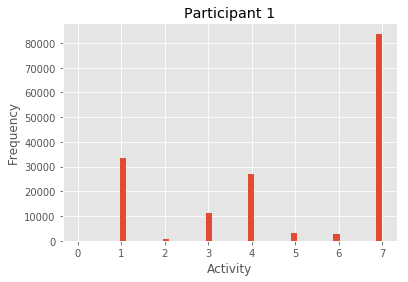

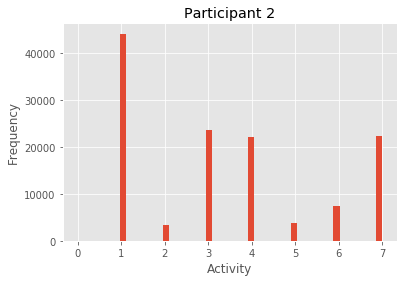

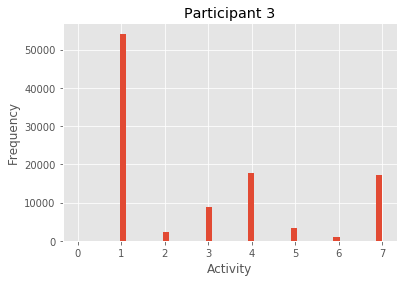

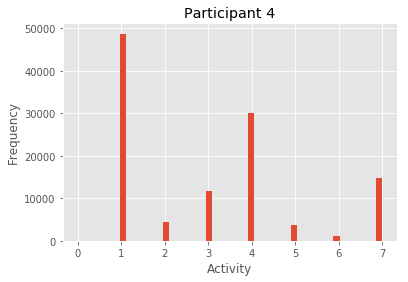

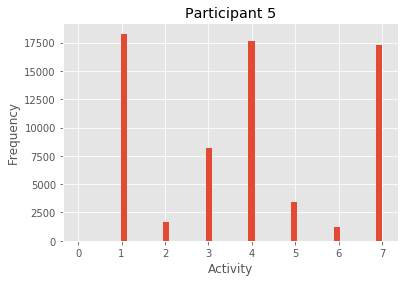

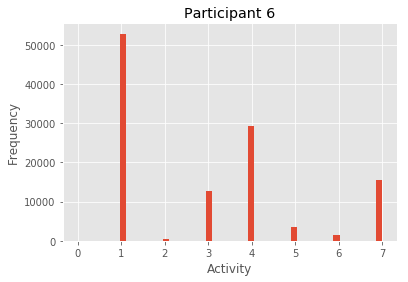

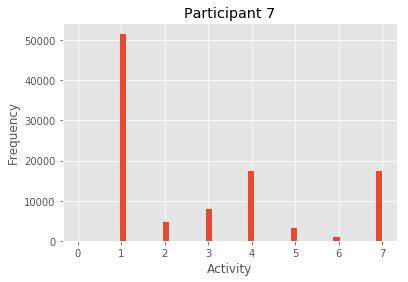

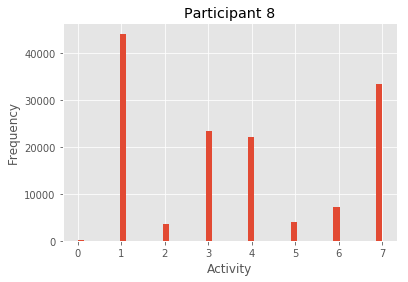

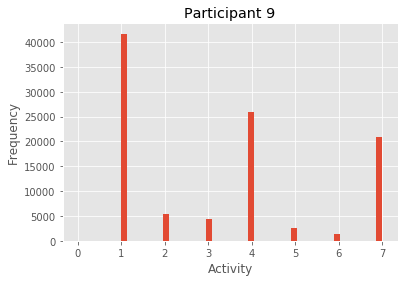

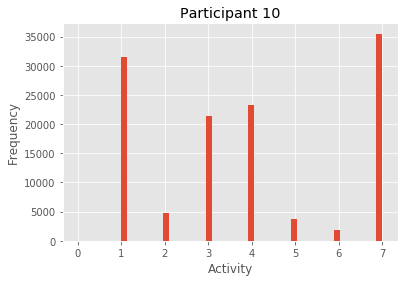

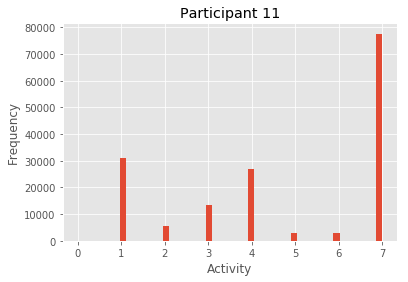

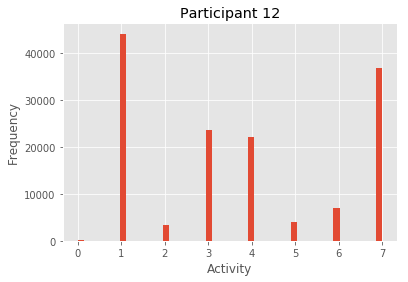

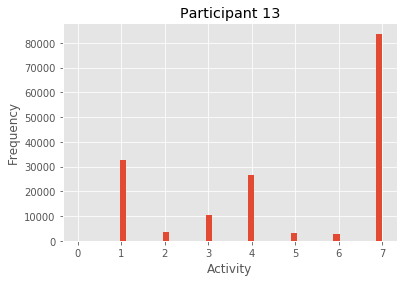

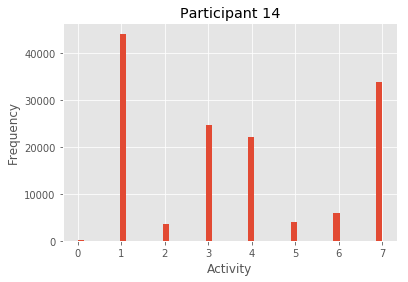

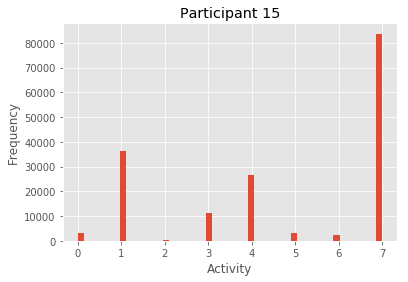

In [256]:
# Visualize the distribution of labels across each participant

for idx, df in enumerate(df_list):
    df['label'].hist(bins = 50)
    plt.xlabel('Activity')
    plt.ylabel('Frequency')
    plt.title('Participant {}'.format(idx + 1))
    plt.show()

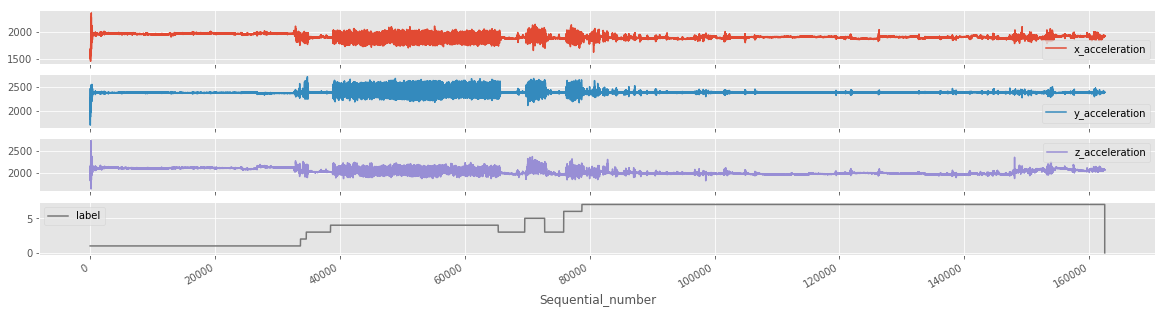

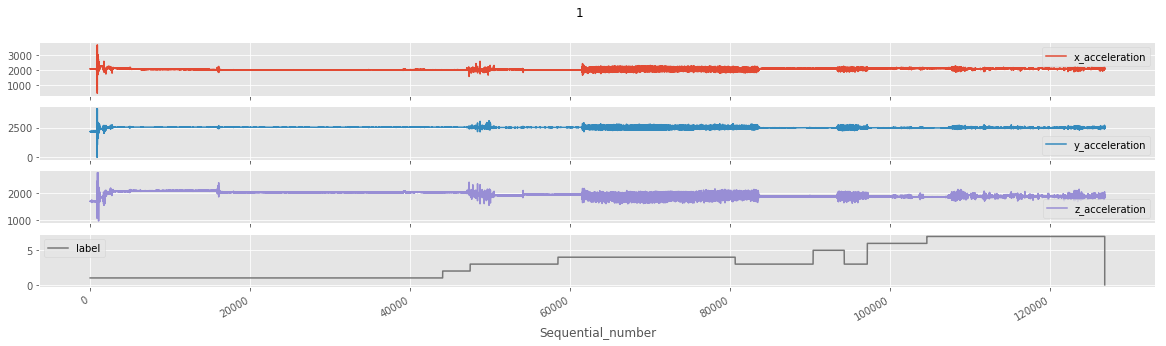

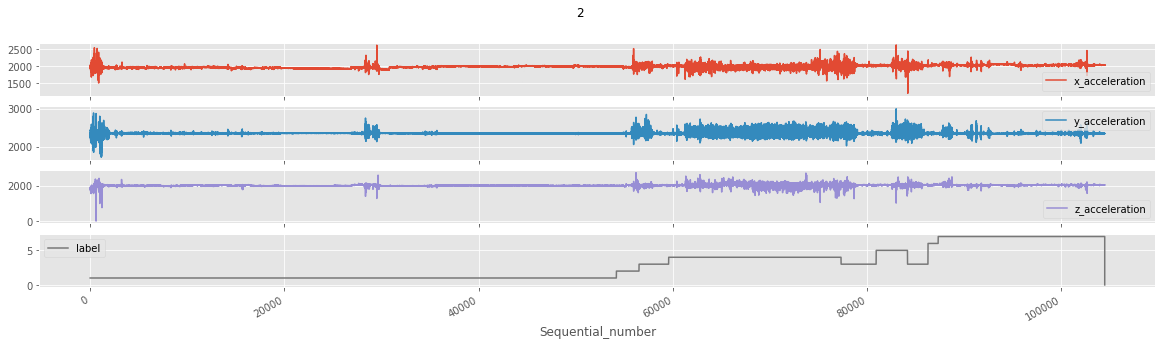

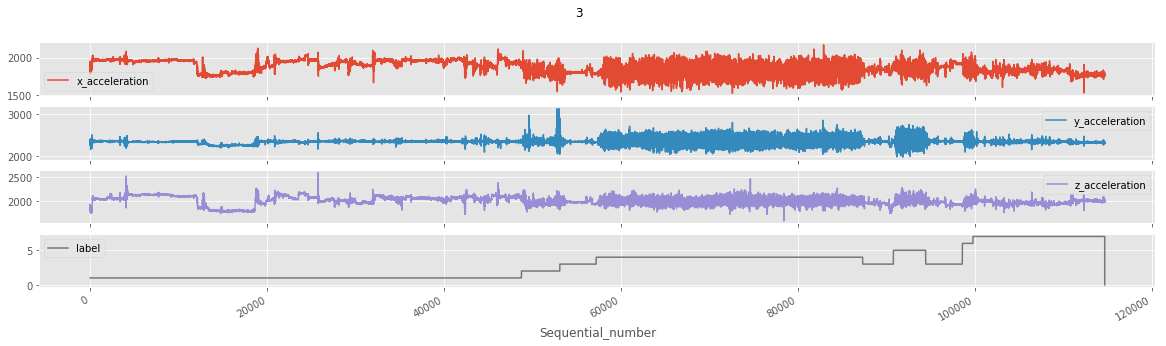

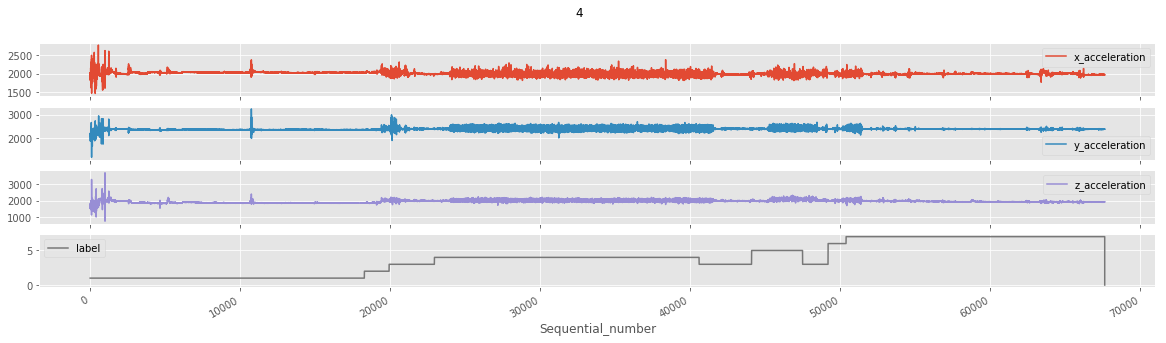

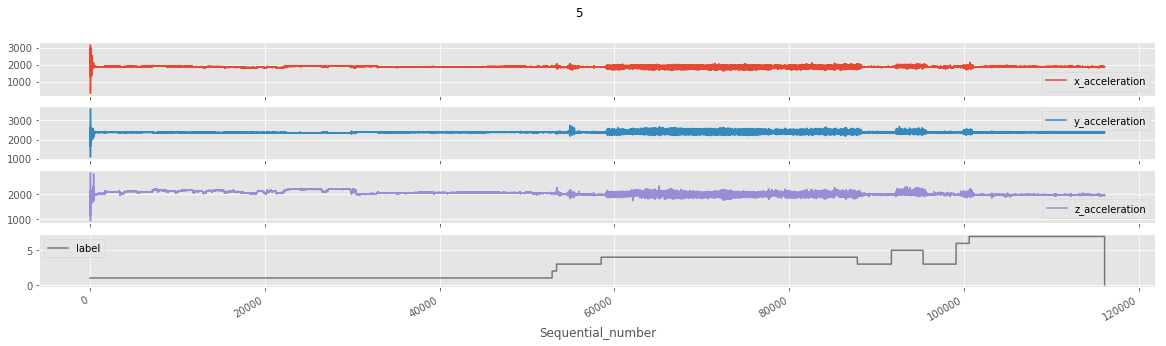

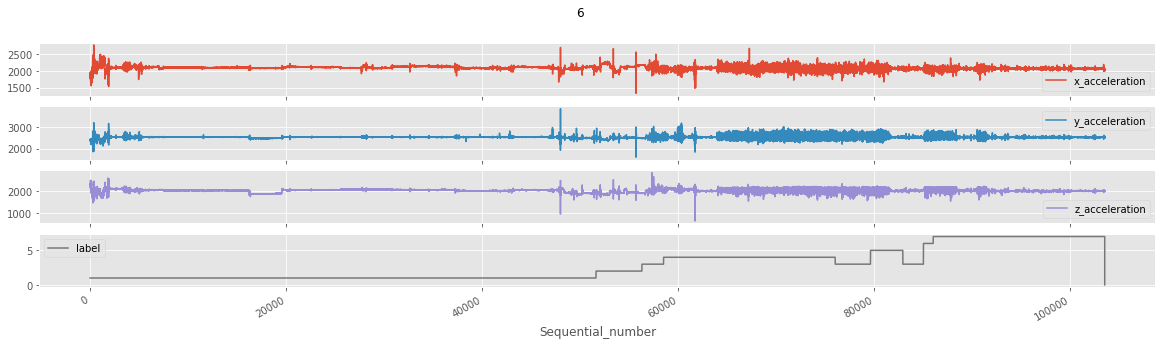

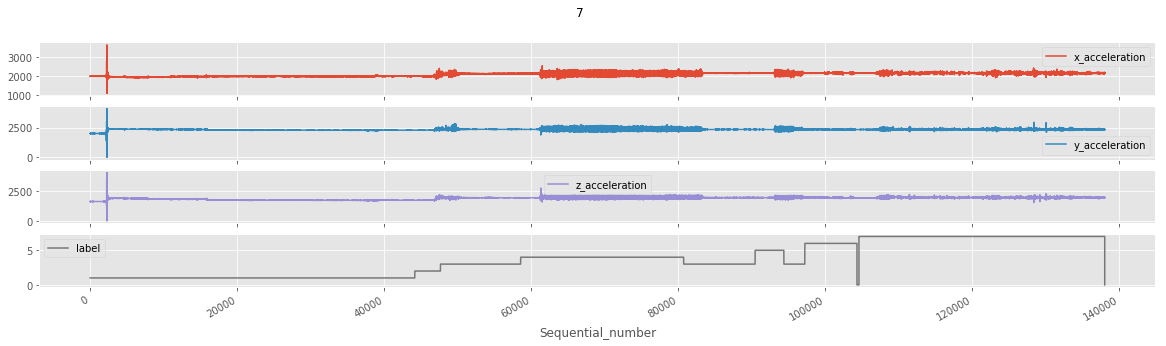

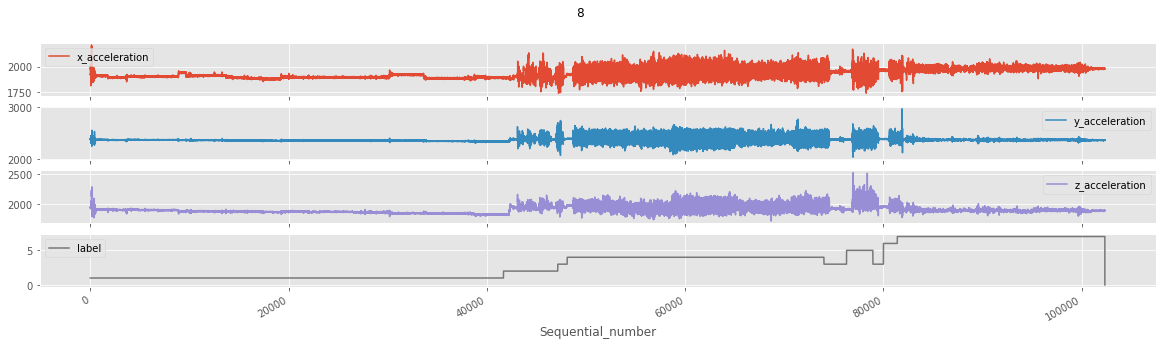

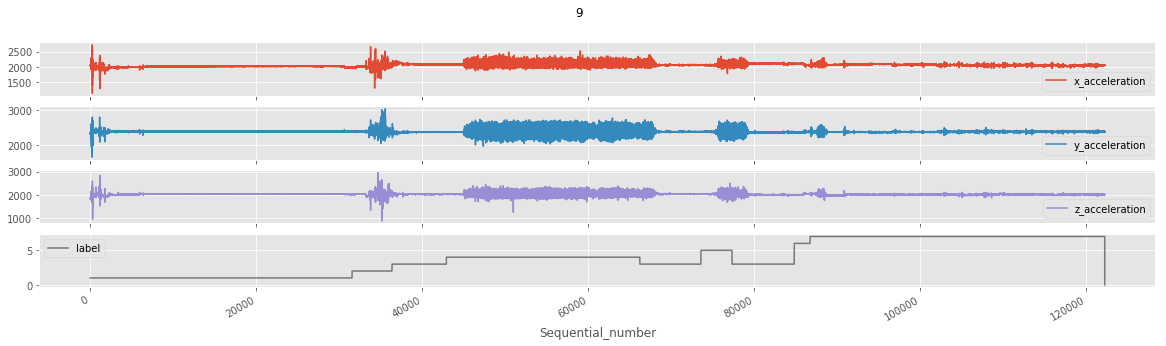

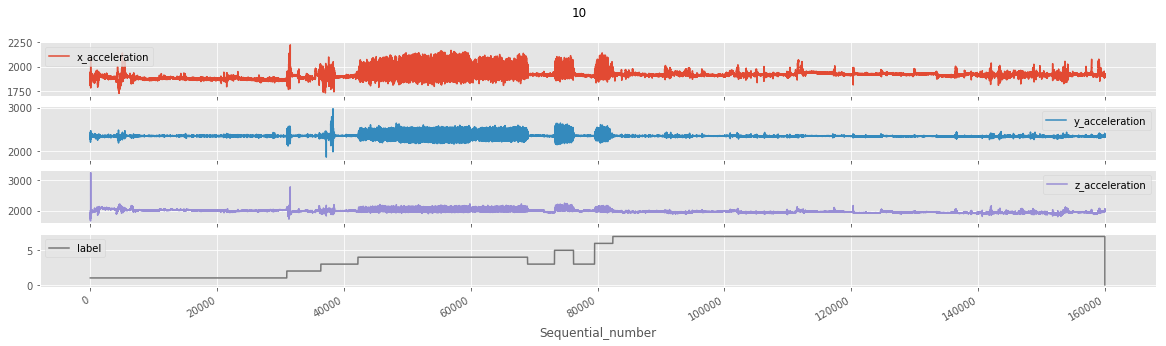

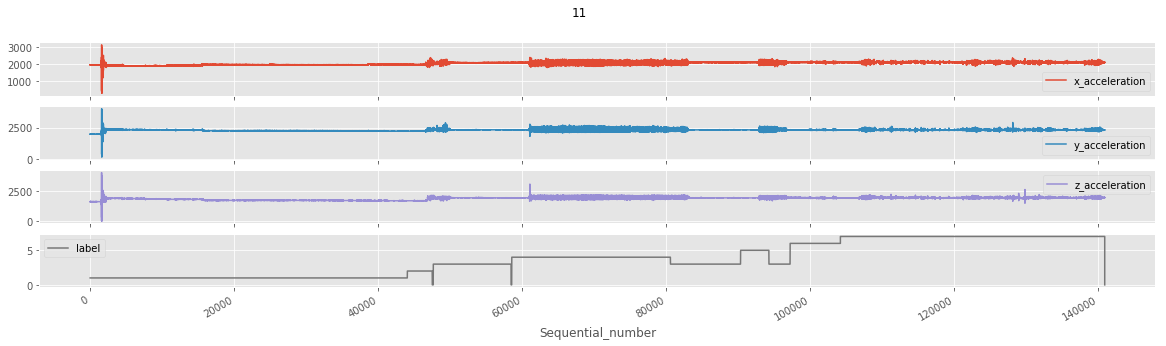

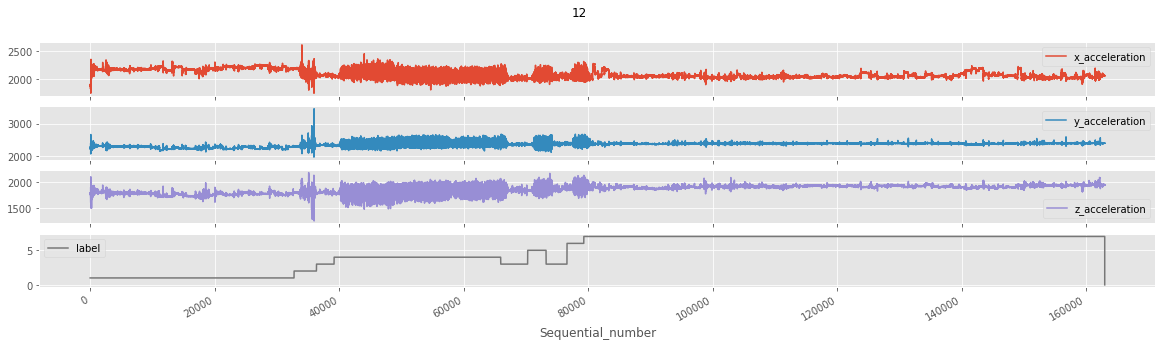

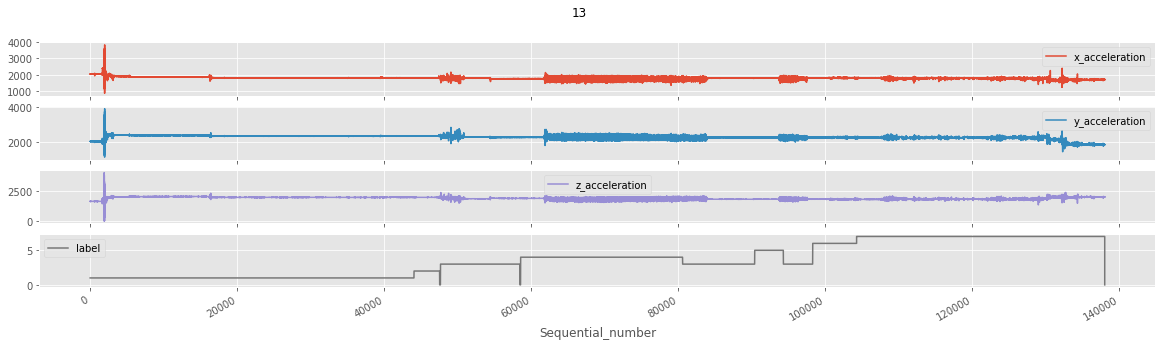

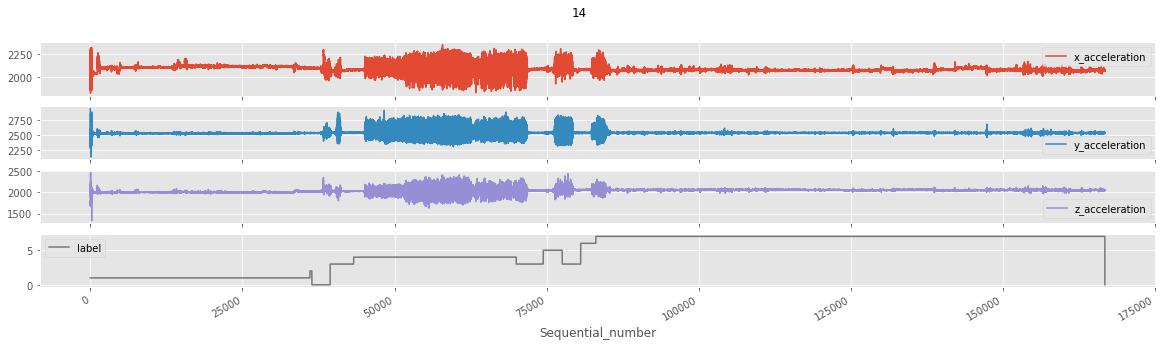

In [260]:
# Check the x, y, z and labels series through the sequence by participant

for idx, _ in enumerate(df_list):
    df_list[idx].set_index('Sequential_number').plot(subplots = True, title = idx, figsize = (20,5))


In [261]:
# Explore if there is a consistant number of time steps in each participant

for idx, df in enumerate(df_list):
    print(df_list[idx].shape)

(162501, 5)
(126801, 5)
(104451, 5)
(114702, 5)
(67651, 5)
(116101, 5)
(103501, 5)
(138001, 5)
(102341, 5)
(122201, 5)
(160001, 5)
(140901, 5)
(163001, 5)
(138001, 5)
(166741, 5)


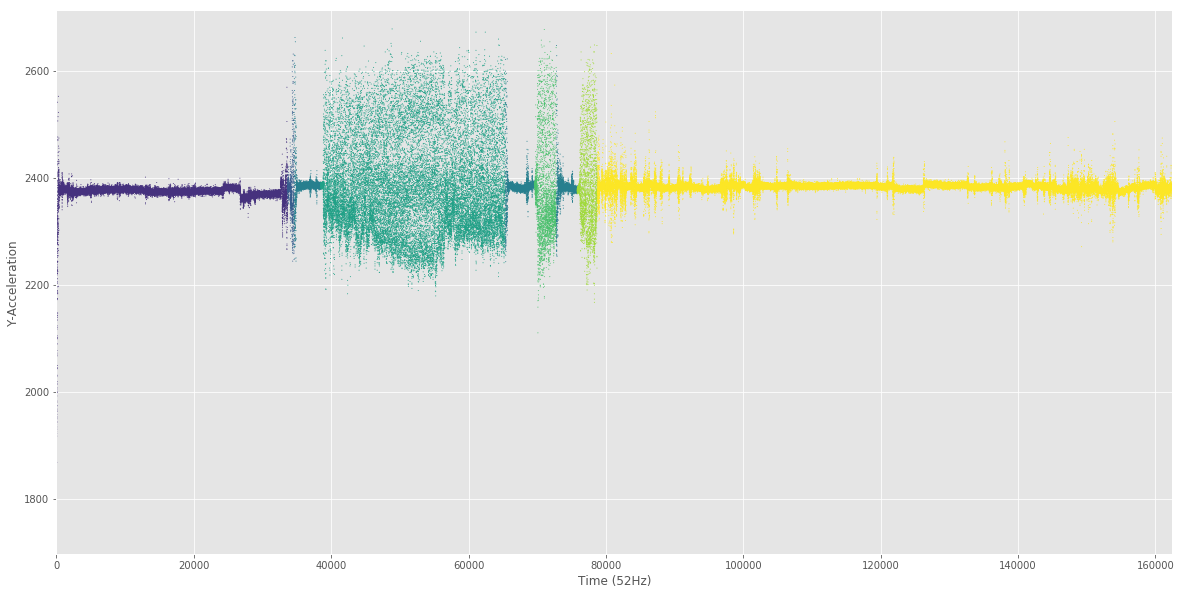

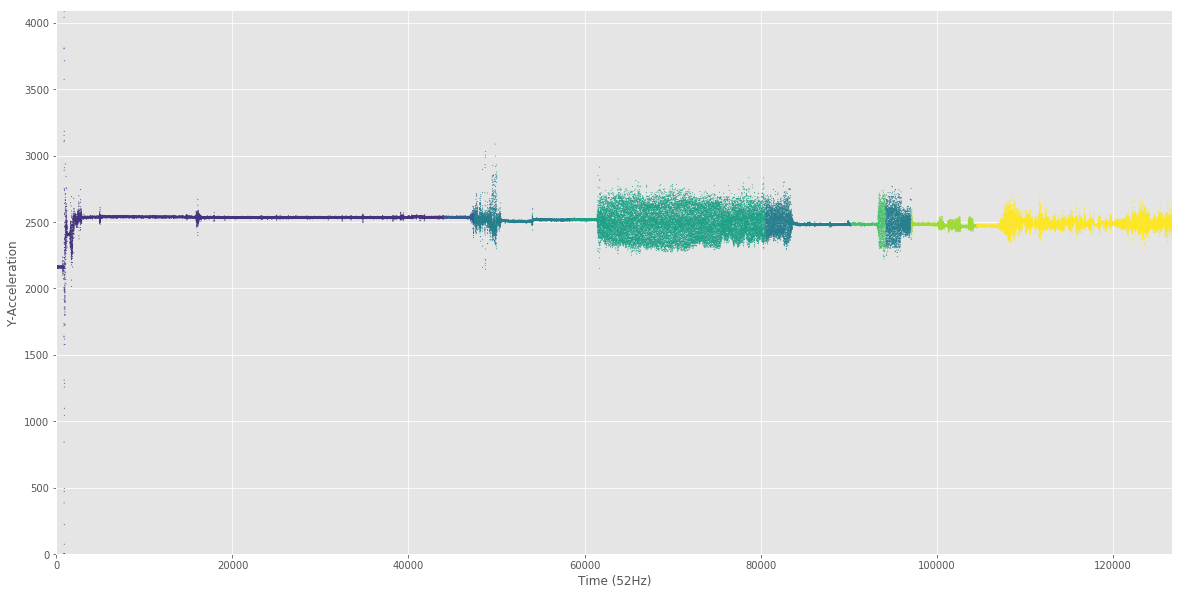

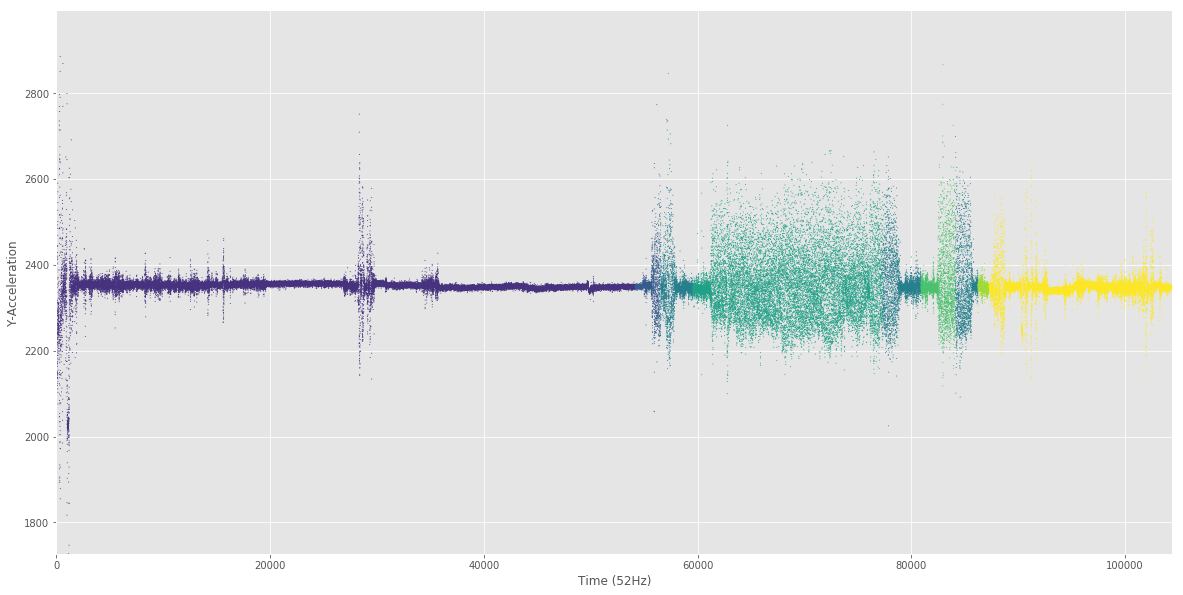

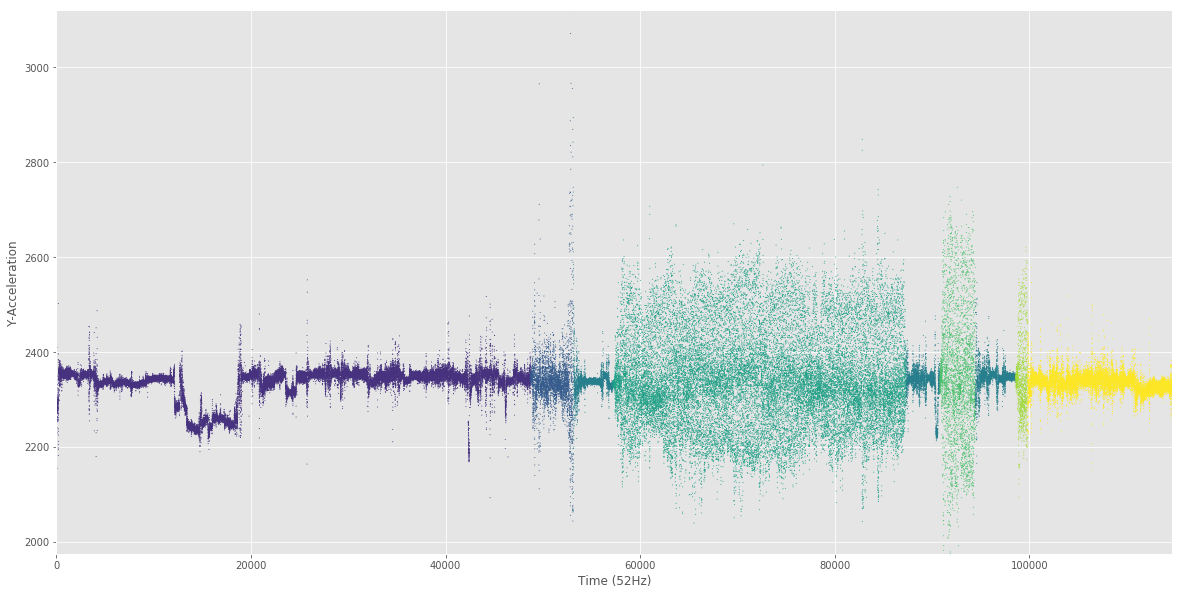

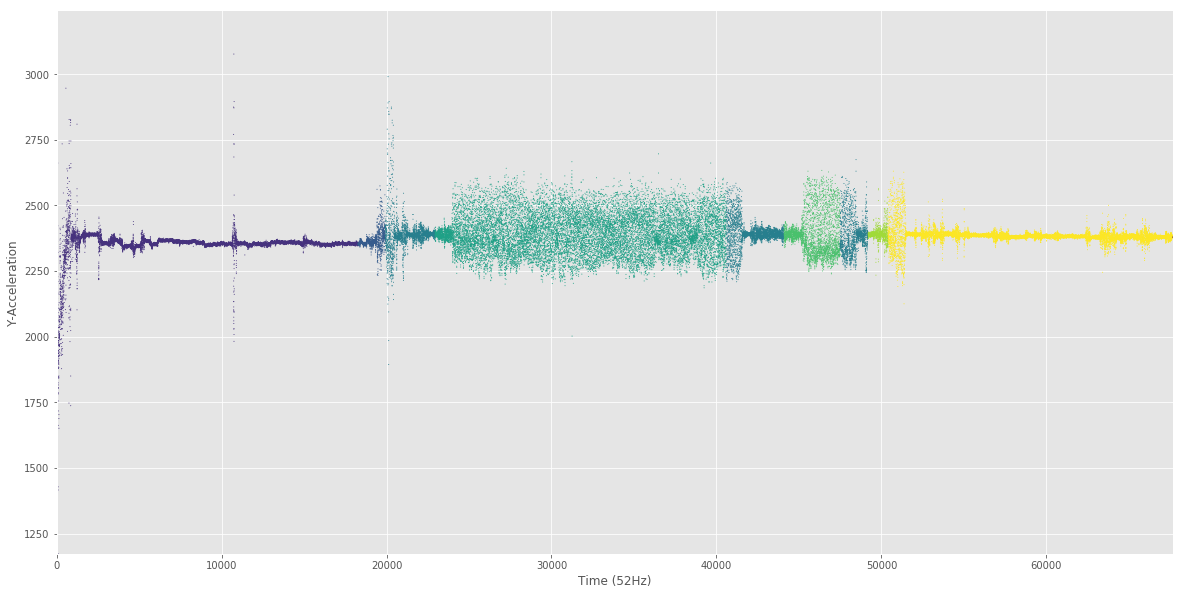

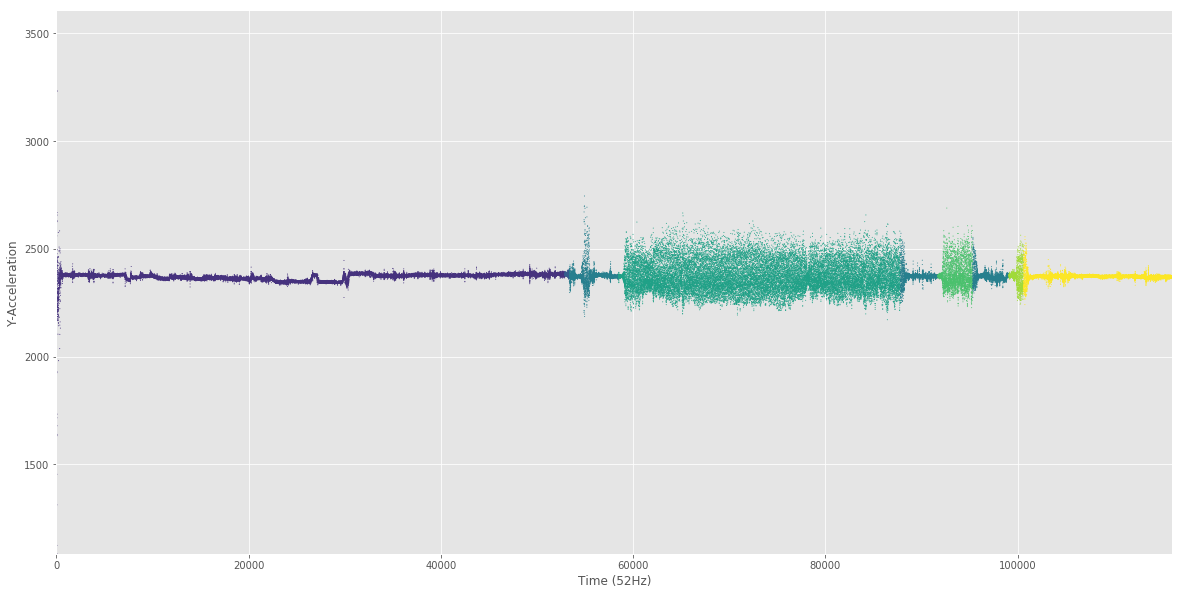

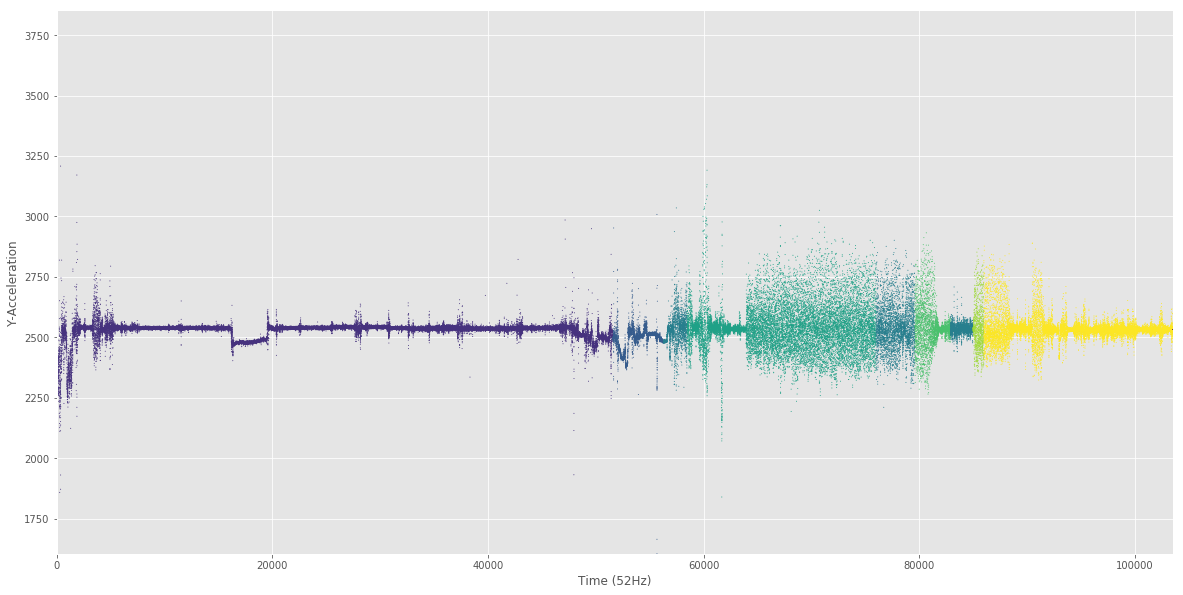

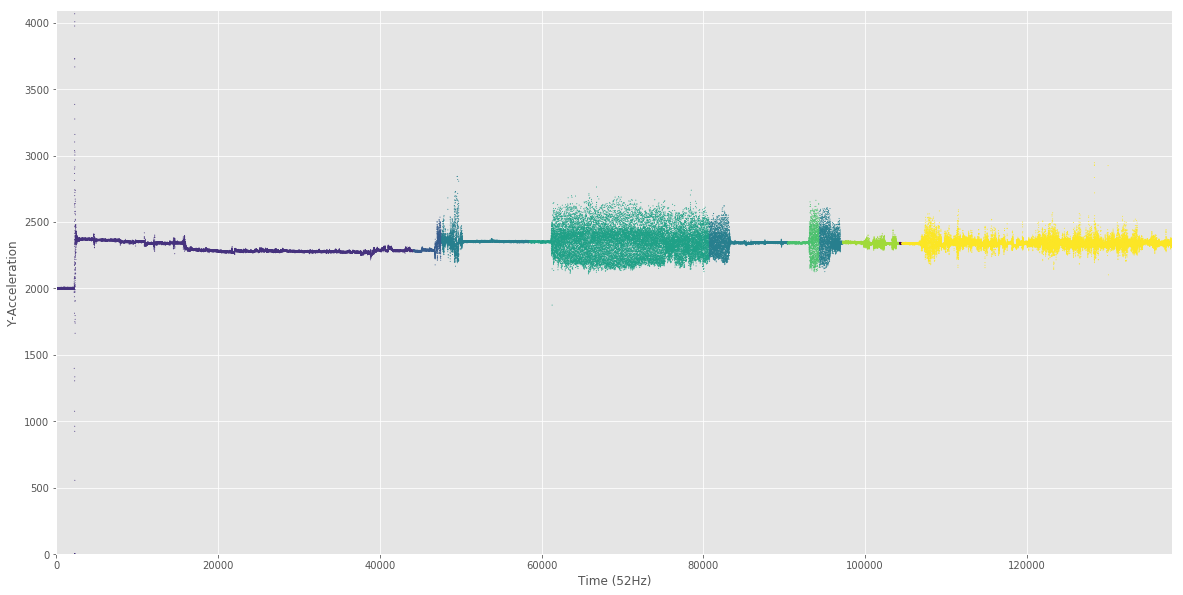

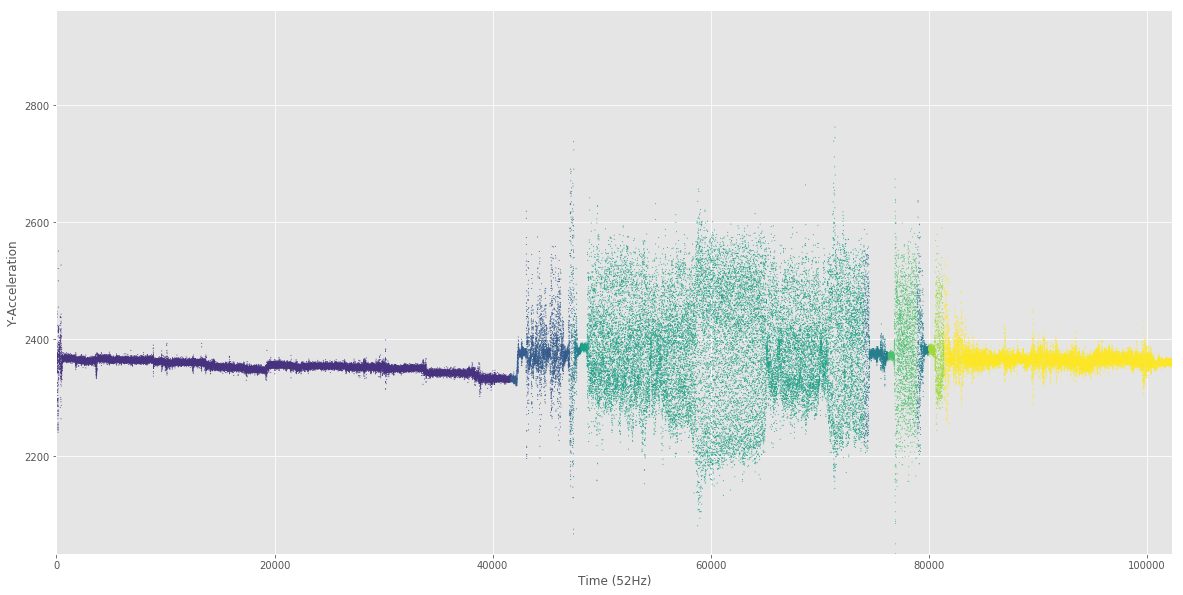

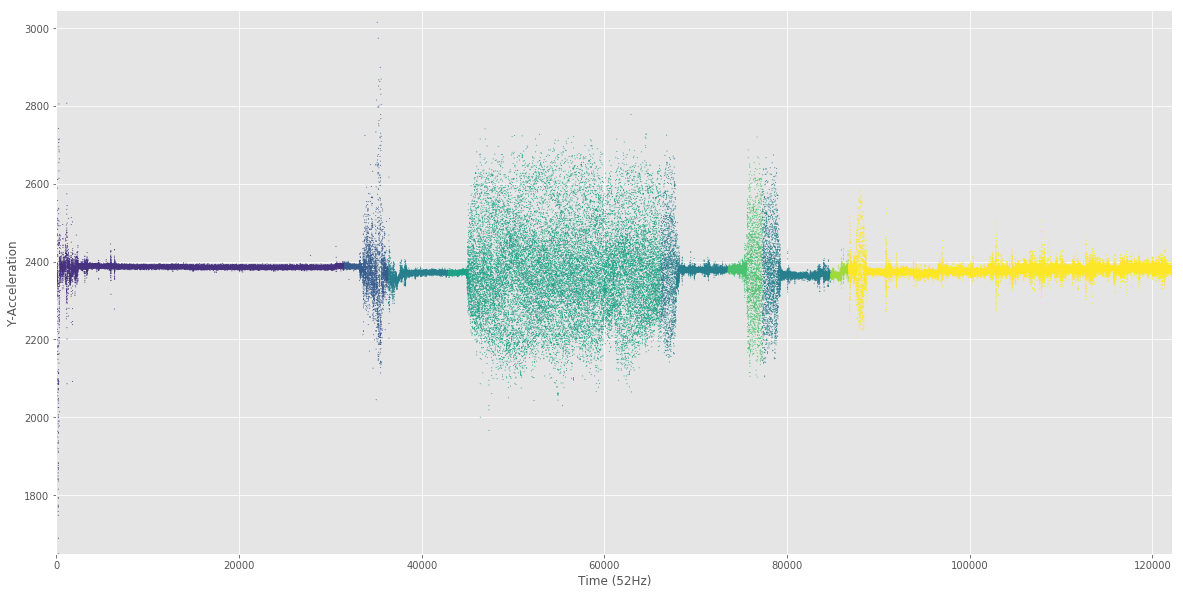

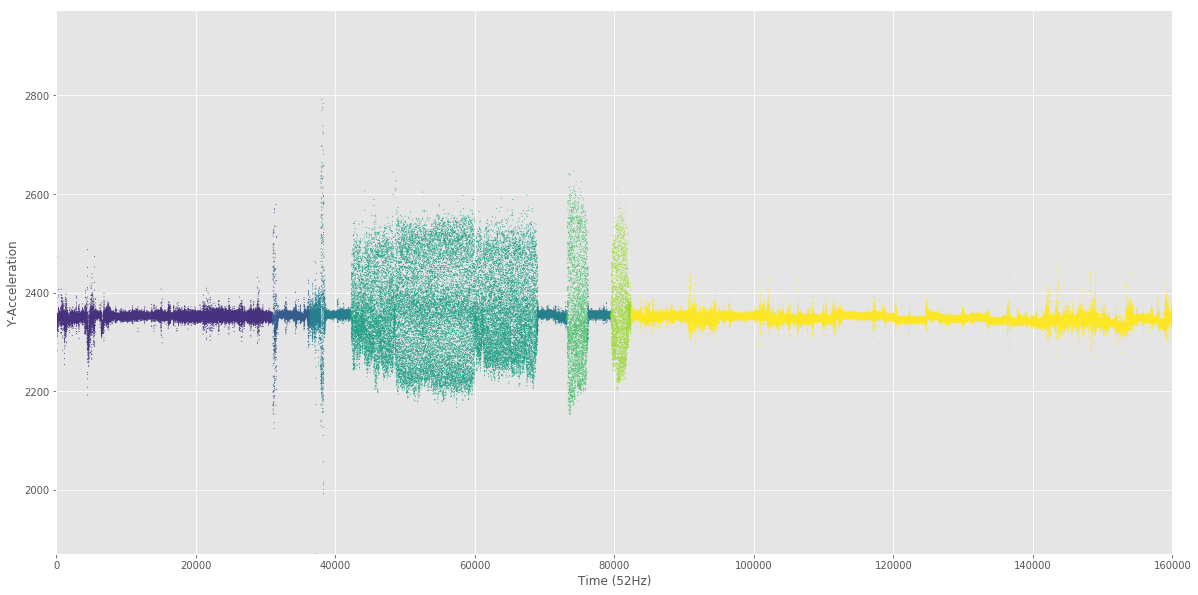

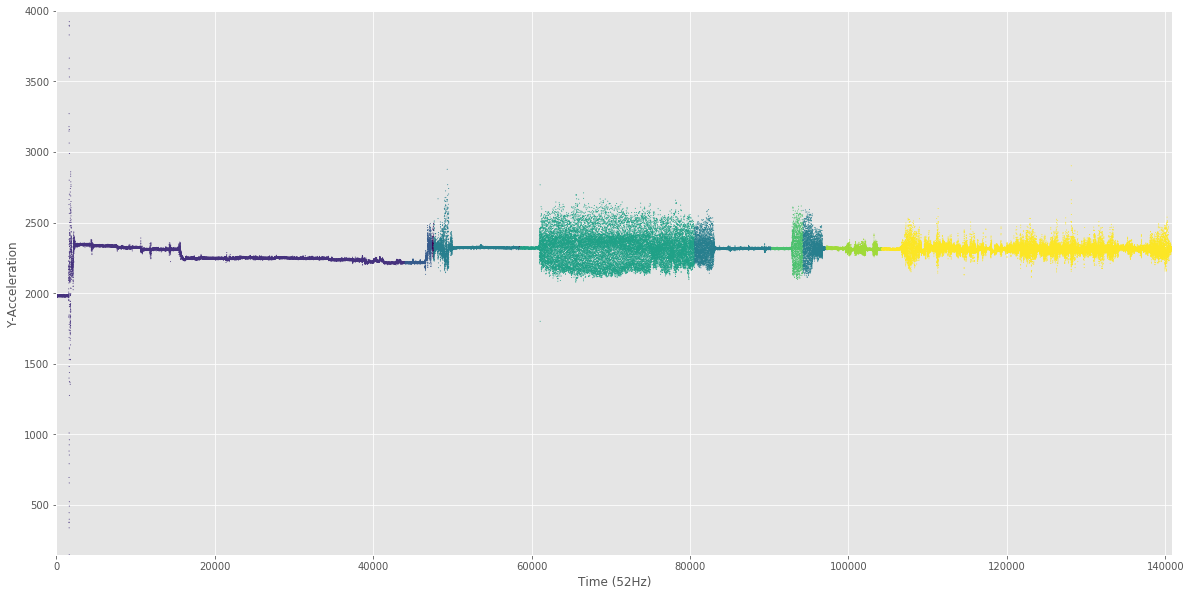

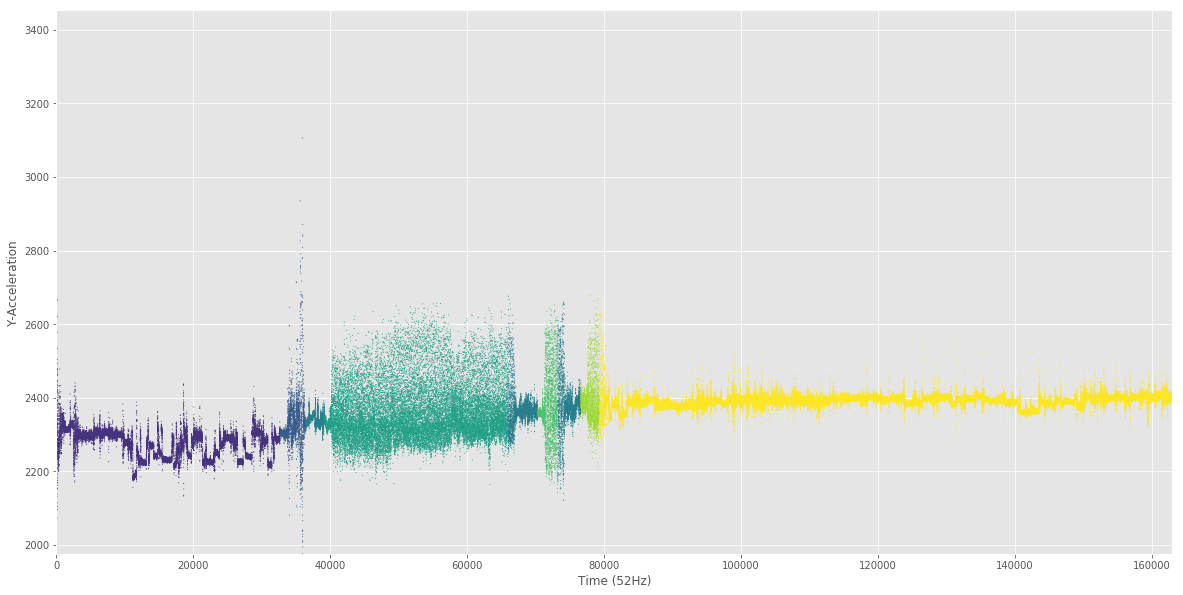

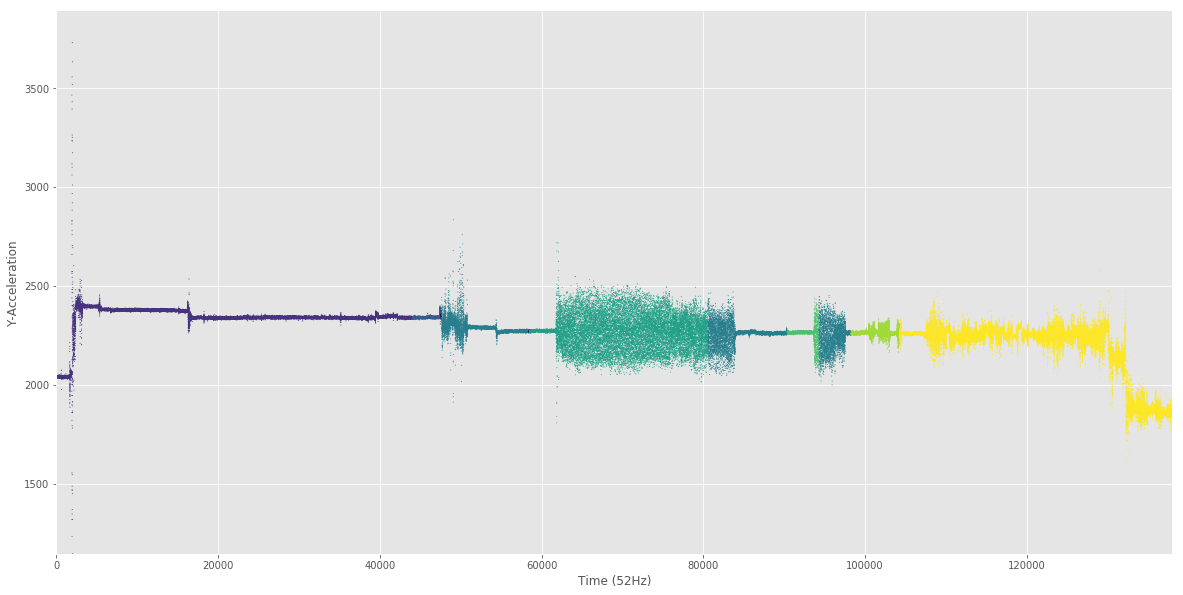

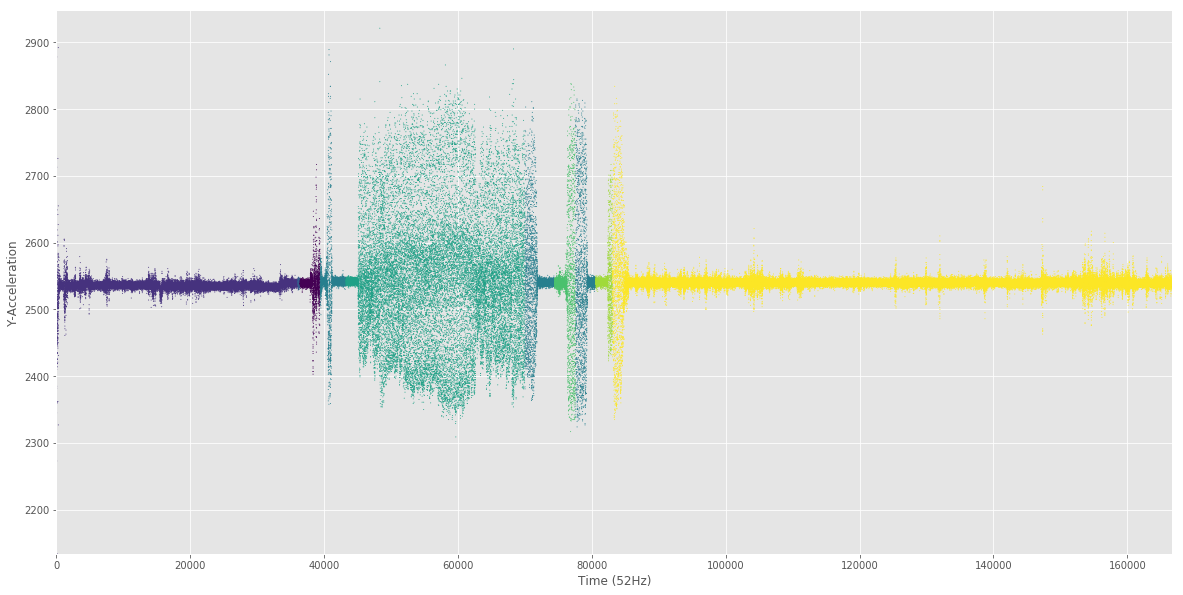

In [262]:
# Plot y and integrate the label as a color to see the flow from activities

for idx, _ in enumerate(df_list):
    x = df_list[idx].Sequential_number
    y = df_list[idx].y_acceleration 

    fig, ax = plt.subplots(figsize=(20,10))

    ax.set_xlabel('Time (52Hz)')
    ax.set_ylabel('Y-Acceleration')

    ax.set_ylim(y.min(), y.max())
    ax.set_xlim(0, len(x))

    ax.scatter(x, y, c=df_list[idx].label, edgecolor='', s=1)

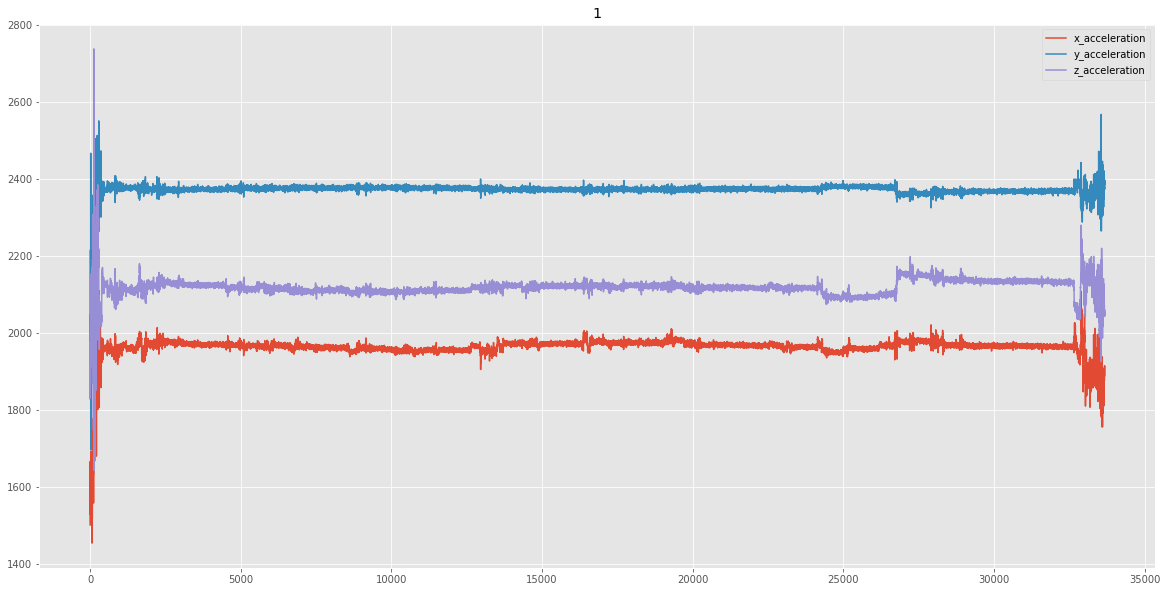

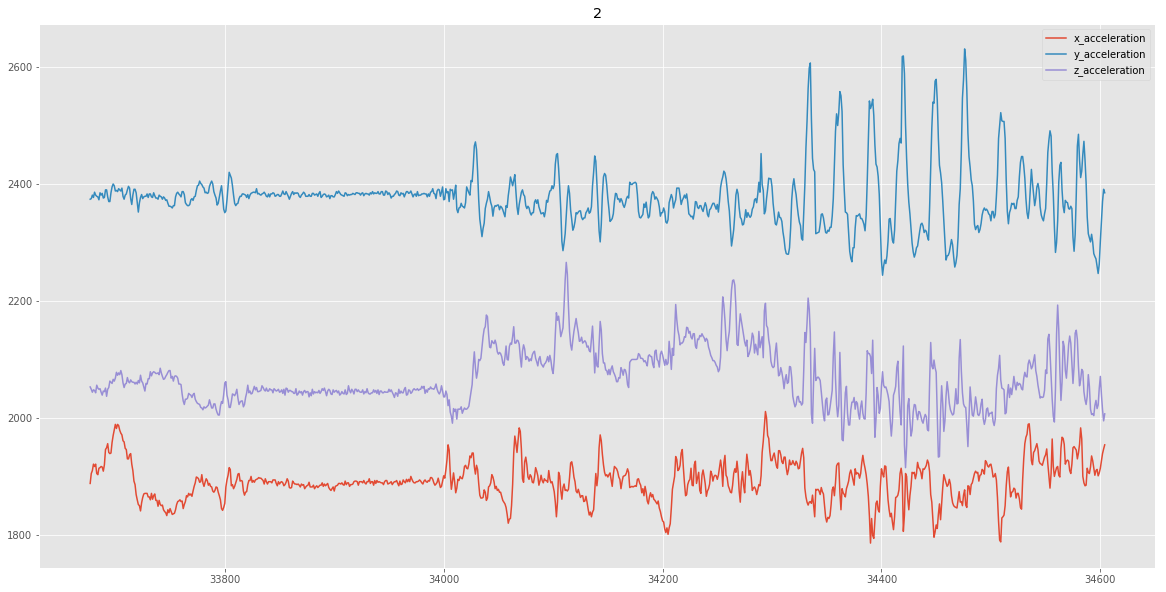

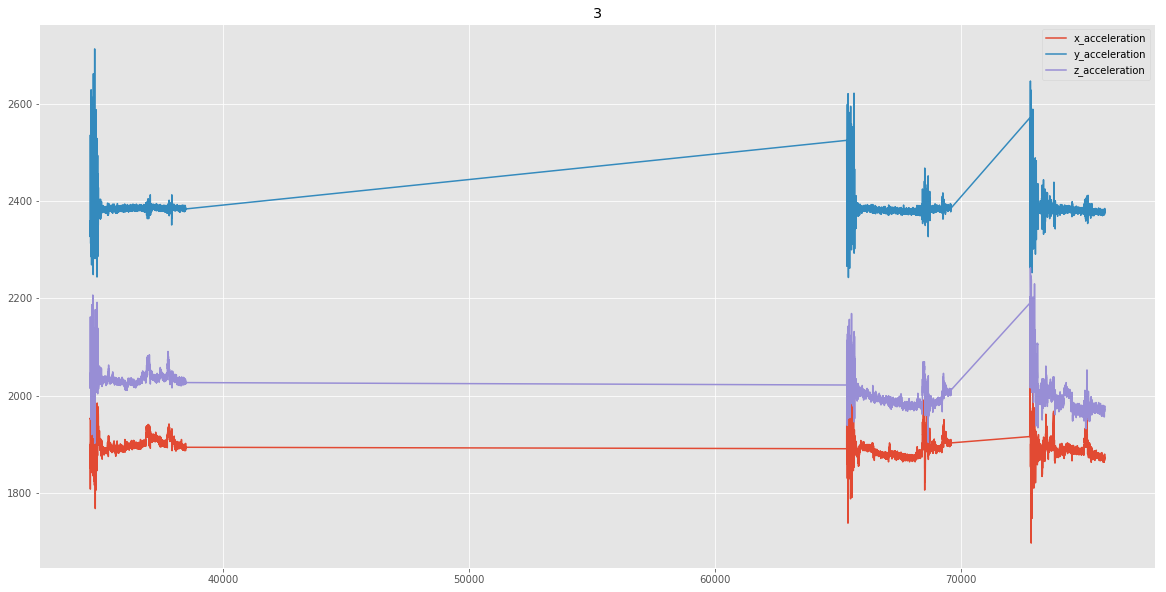

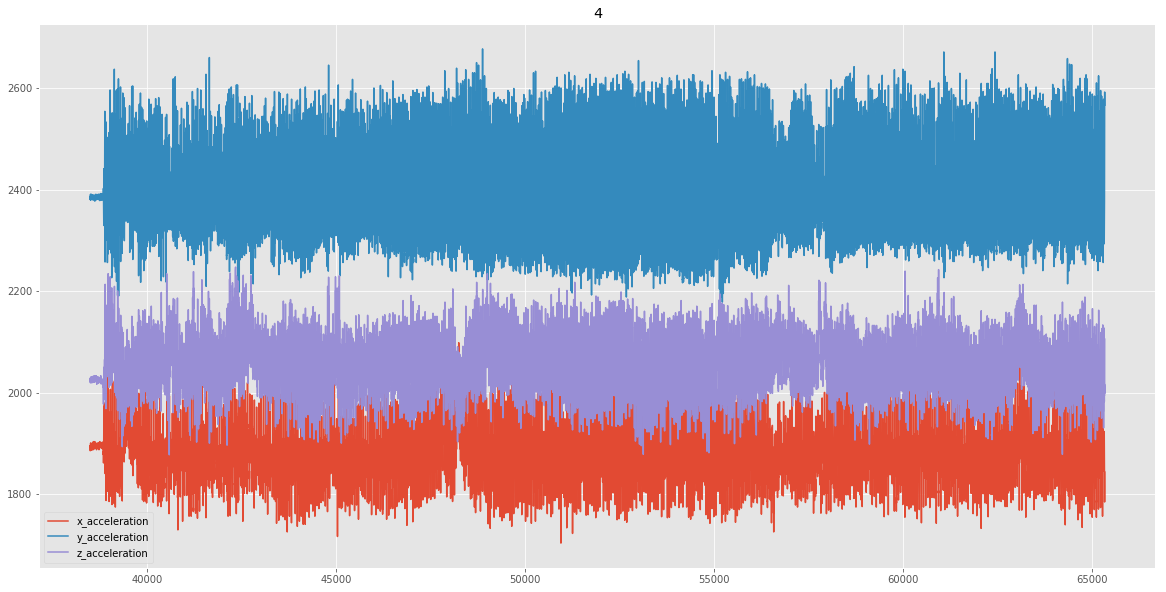

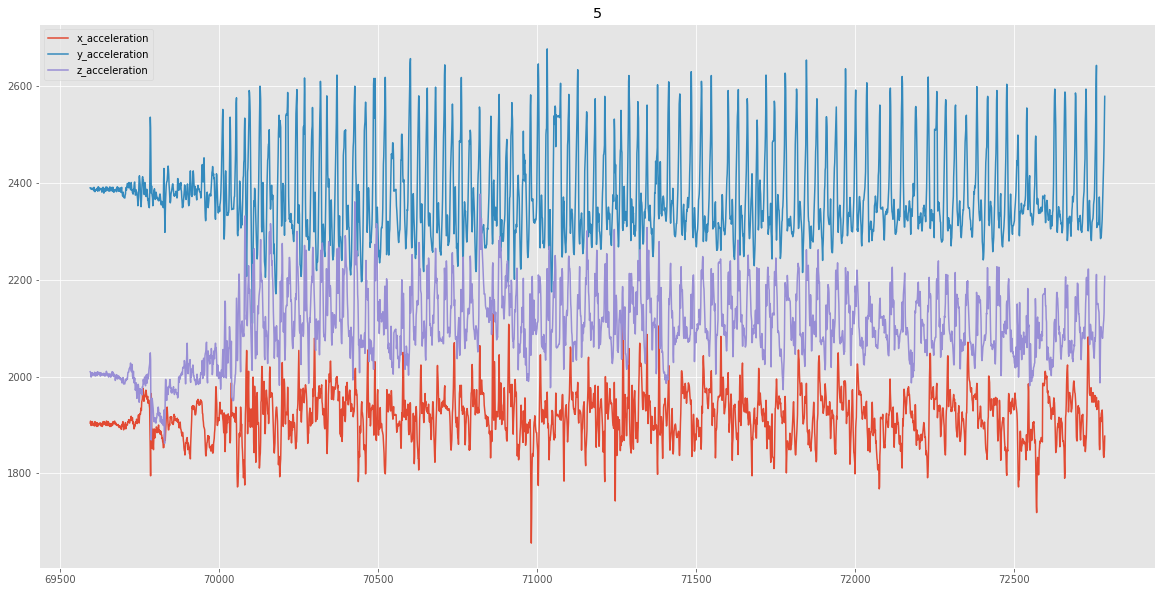

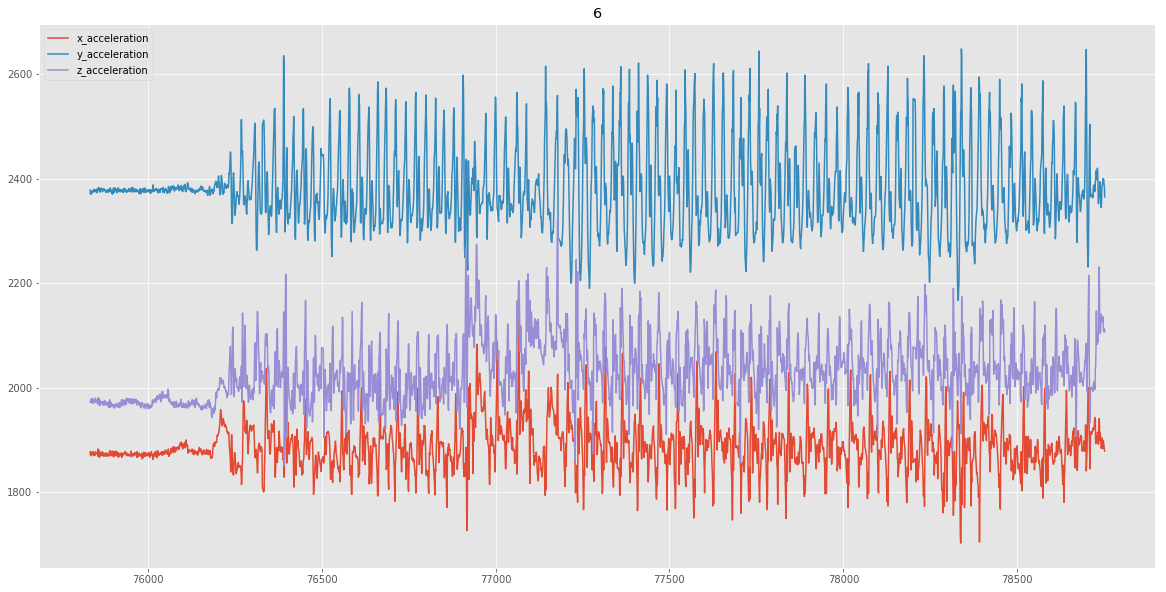

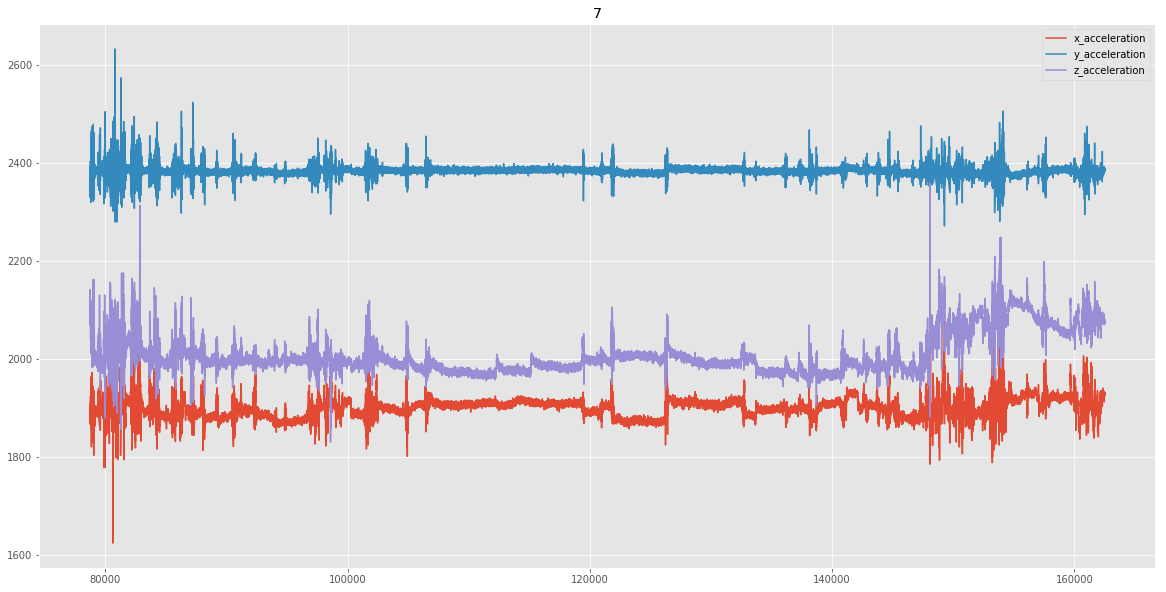

In [264]:
# Visualize the x, y and z by class for an arbitrary participants by category

sample_df_2 = df_list[10]

for i in range(1,8):
    sample_df[['x_acceleration', 'y_acceleration', 'z_acceleration']][sample_df.label == i].plot(figsize=(20,10))
    plt.title("{}".format(i))


C:\Users\sawal\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\sawal\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
C:\Users\sawal\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

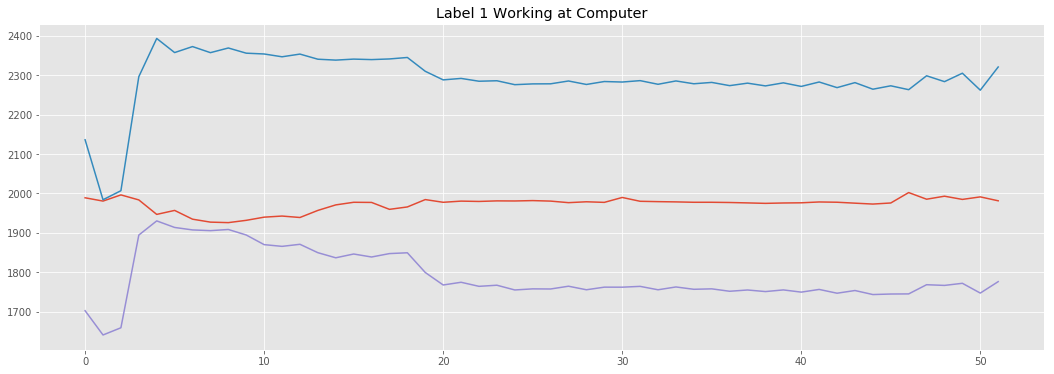

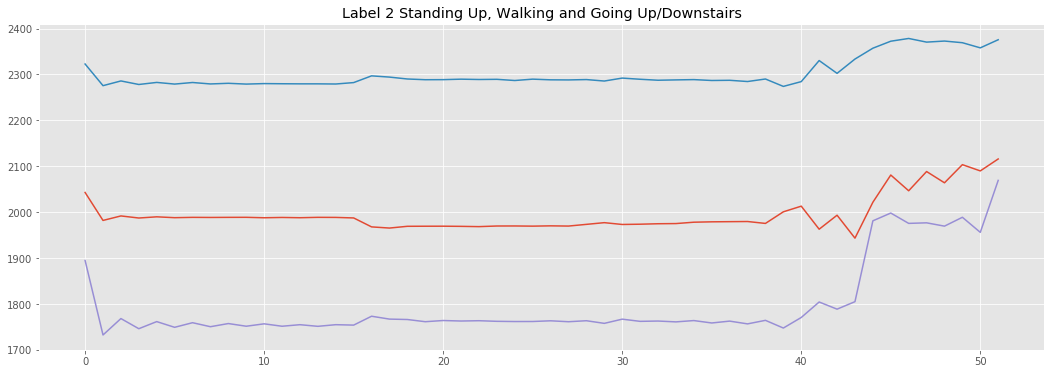

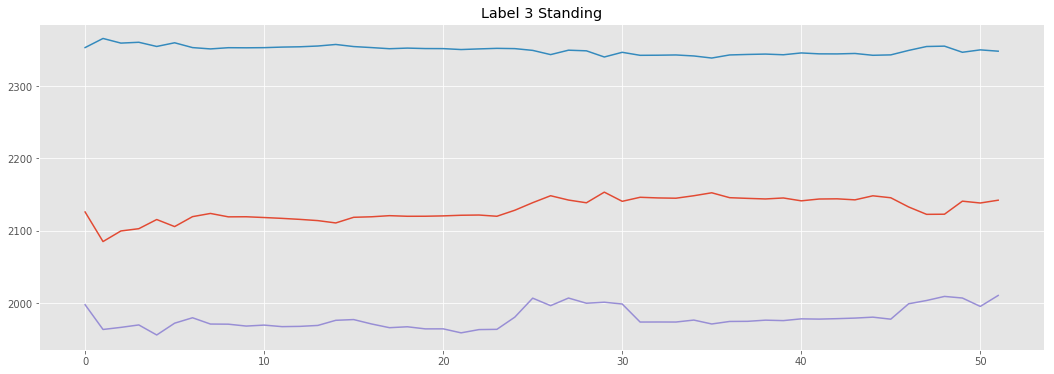

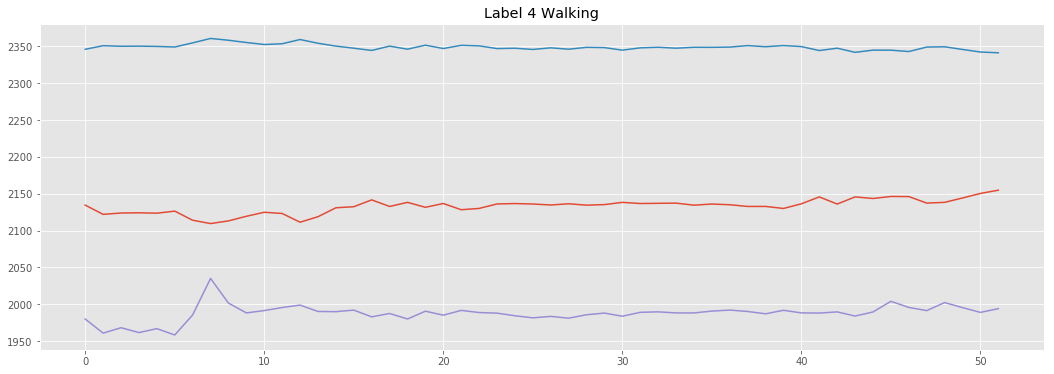

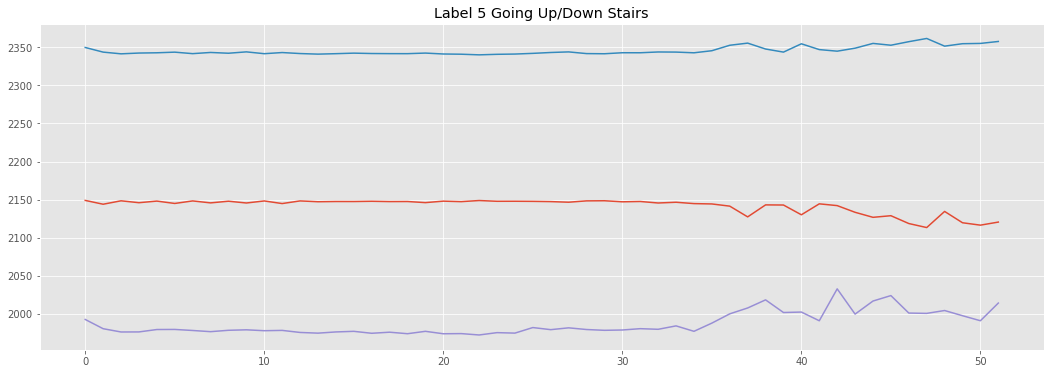

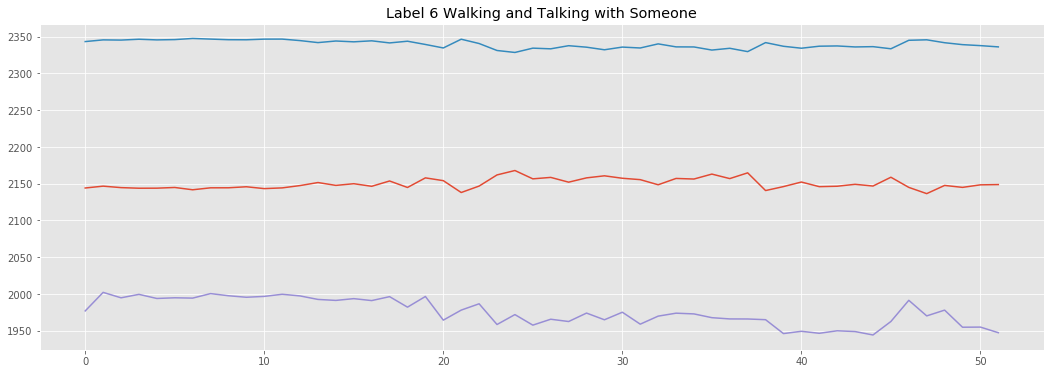

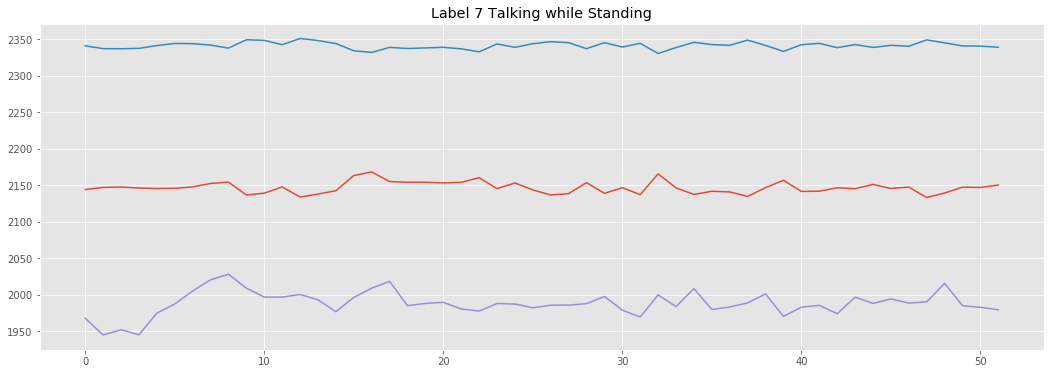

In [265]:
# It is difficult to interpret at that high resolution, resampling for graphical analysis

seconds = 1
freq = 52

for num, label in map_dict.items():
        df_label = sample_df_3[sample_df_3['label'] == num]
        resampled_x = signal.resample(df_label.x_acceleration, seconds * freq)
        resampled_y = signal.resample(df_label.y_acceleration, seconds * freq)
        resampled_z = signal.resample(df_label.z_acceleration, seconds * freq)

        fig, ax = plt.subplots(figsize = (18,6))
        ax.set_title(label = 'Label {} '.format(num) + '{}'.format(label))
        ax.plot(resampled_x)
        ax.plot(resampled_y)
        ax.plot(resampled_z)


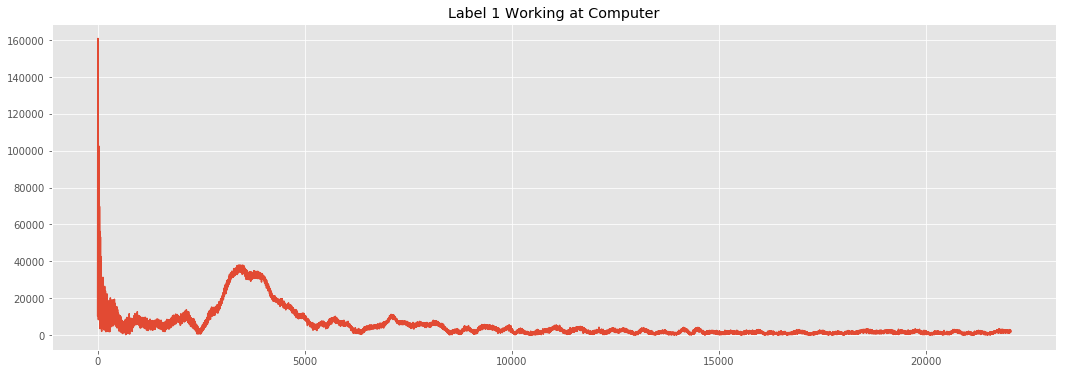

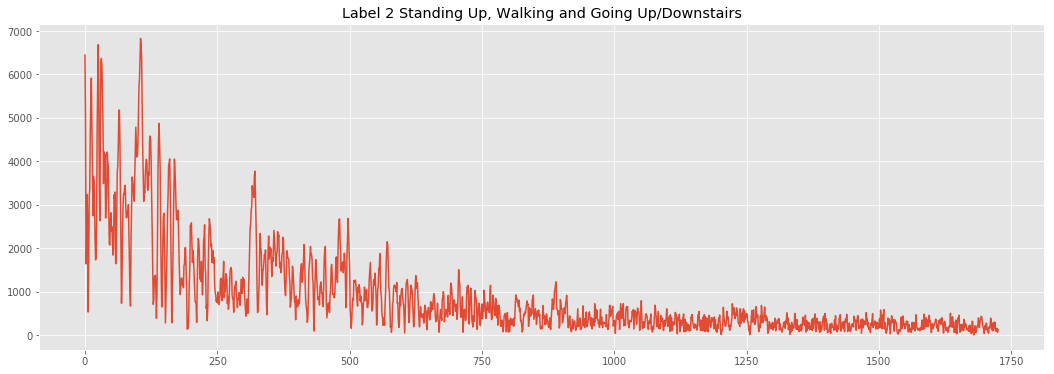

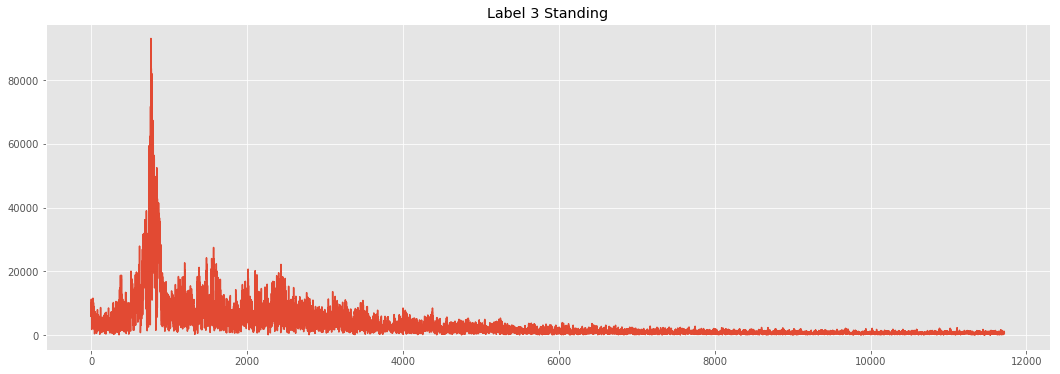

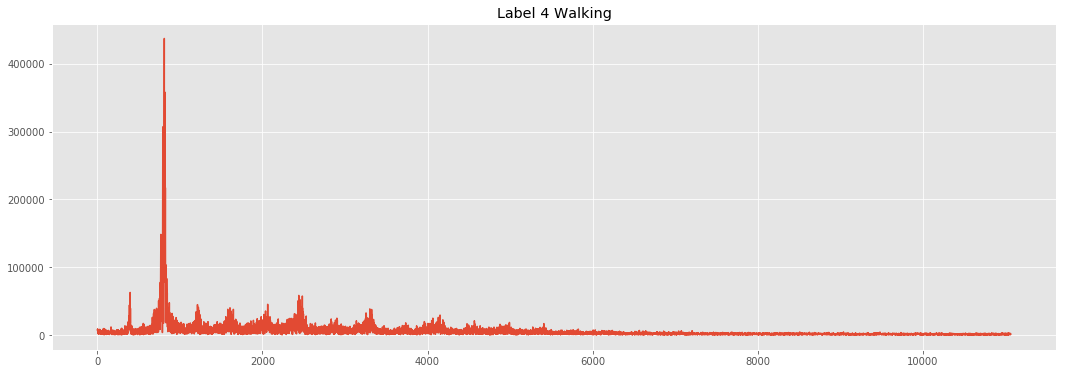

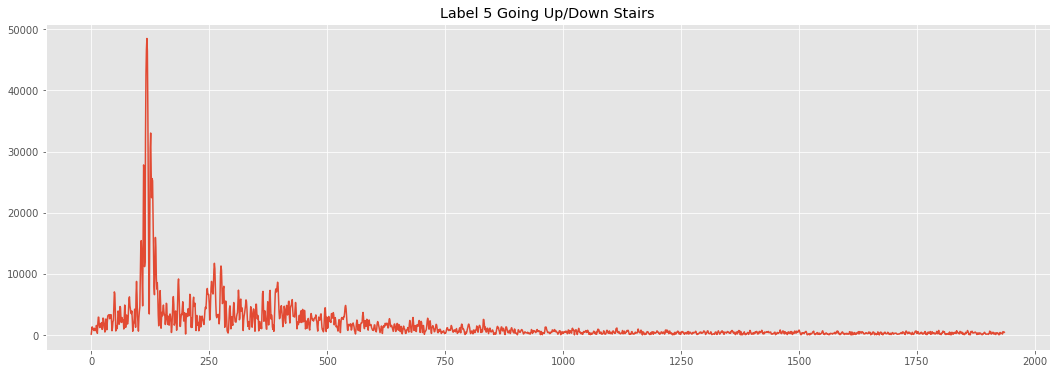

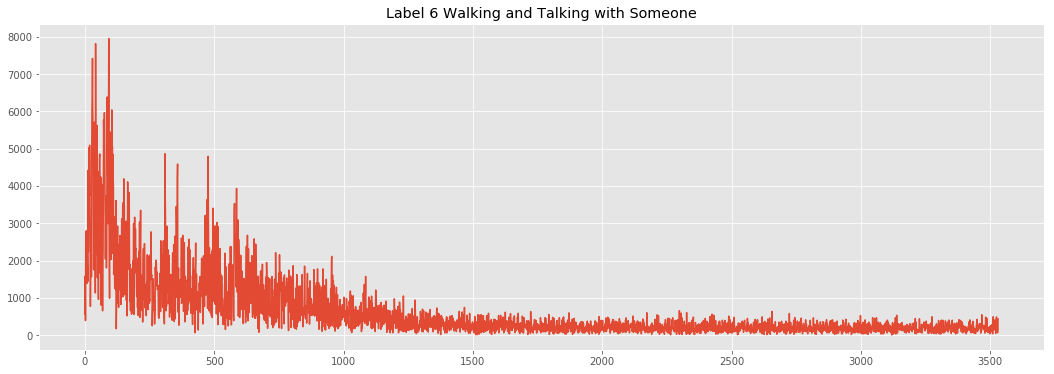

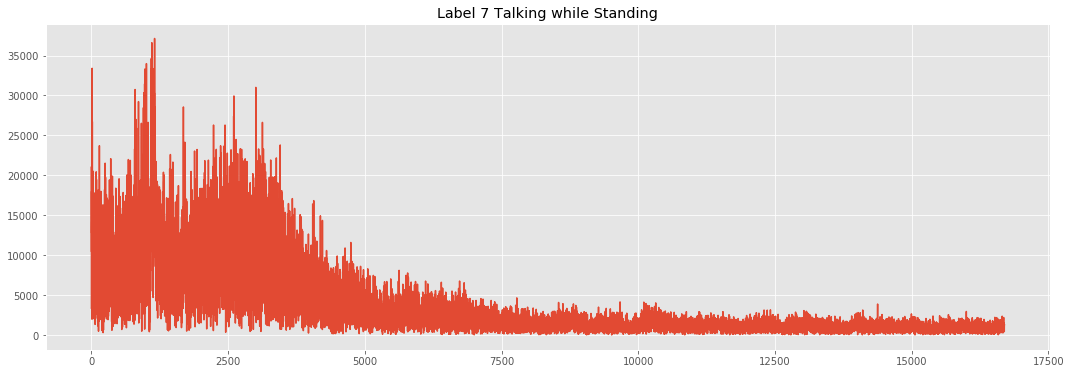

In [99]:
# Perform a Fourier transformation of the data. This will help us get a 
# better sense of the potential frequency of the periodic components a signal

for num, label in map_dict.items():
        df_label = sample_df_3[sample_df_3['label'] == num]
        transformed_y = np.absolute(np.fft.rfft(df_label.y_acceleration))

        fig, ax = plt.subplots(figsize = (18,6))
        ax.set_title(label = 'Label {} '.format(num) + '{}'.format(label))
        ax.plot(transformed_y[20:])  # Beginning of activity creates a large spike which throws off the overall resolution. Possibly noise.


Even with a smoother resolution and using Fourier transformation, its difficult to discern any obvious pattern visually.It is clear that the beginning o We will now combine the data for a more clear picture

In [266]:
# Combine data for further analysis

df_combined = pd.concat(df_list, ignore_index=True)

df_combined.label.value_counts(normalize = True)

1    0.315880
7    0.308041
4    0.185305
3    0.112480
5    0.026726
2    0.024847
6    0.024791
0    0.001930
Name: label, dtype: float64

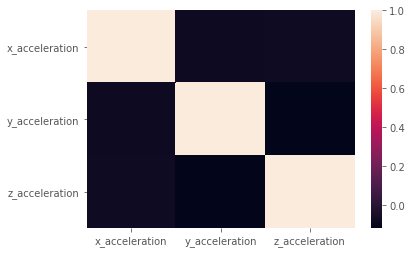

In [267]:
# Create a correlation matrix to see if x, y or z are strongly correlated
            
cor = df[['x_acceleration', 'y_acceleration', 'z_acceleration']].corr()
sns.heatmap(cor)
plt.show()

This dataset's classes are imbalanced; some activities, namely working at a computer and talking while standing are more prevalent than others. This will be be important during the modeling phase when we will have to use sampling to avoid bias.

Looking at our independent variables, x, y and z there are notable increases in acceleration at the beginning of the activities which may be outliers/noise associated with an activity change.

While there are no null values, when we concatenate the dataframe, we can see there is a '0' activity in the Label column. This could represent an error or no activity. Since this variable shows up relatively few times and is not mentioned in the documentation it will be removed before modeling

## Creating the null model 

As a basis of comparison, we will create a null model that does not take into account the sequential nature of this dataset. We will use a K-NN Classifier with cross validation and grid search.

In [268]:
# Remove data with "0" feature

df_combined = df_combined[df_combined.label != 0]

In [269]:
df_combined.label.describe() # Sanity check

count    1.923177e+06
mean     3.890407e+00
std      2.439785e+00
min      1.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      7.000000e+00
Name: label, dtype: float64

In [270]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Construct matrix of feature

X = df_combined[['x_acceleration', 'y_acceleration', 'z_acceleration']] 

# Vector of predictions

y = df_combined['label']

# Create a parameter grid dictionary

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

param_grid = {'n_neighbors': [3,4,5,6]}

clf_knn = KNeighborsClassifier()

grid = GridSearchCV(clf_knn, param_grid)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Best param: {}".format(grid.best_params_))

C:\Users\sawal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best param: {'n_neighbors': 6}


In [271]:
print("Best score: {}".format(grid.best_score_))

Best score: 0.728633166096971


In [272]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.91      0.88    121814
           2       0.41      0.19      0.26      9579
           3       0.51      0.49      0.50     43374
           4       0.63      0.69      0.66     71566
           5       0.33      0.13      0.18     10235
           6       0.41      0.22      0.29      9411
           7       0.78      0.79      0.78    118657

   micro avg       0.73      0.73      0.73    384636
   macro avg       0.56      0.49      0.51    384636
weighted avg       0.71      0.73      0.72    384636



We will use this low score as the lower bound/null model. Our performance should exceed this score 

## Feature Engineering

We will now begin extracting features for modeling. This entails finding the proper window and computing the relevent statistics.

Choosing the ideal sampling rate will influnece our model's performance. We want the sampling rate to be high enough that we don't lose the characteristics of the signal.

In [275]:
from tqdm import tqdm_notebook as tqdm
import sys

def window_function(window, overlap, upper_bound):
    """ creates lower and upper bound with overlap"""
    start = 0
    while True:
        end = start + window
        if end >= upper_bound:
            return None
        yield start, end
        start += max(int((1-overlap) * window),1)

def rolling_window(df, window, overlap):
    """ Apply the window function to our dataset
    """
    windows = window_function(window, overlap, len(df))
    for start, end in windows:
        yield df[start:end]

        
def feature_extractor(seconds, input_features, overlap, sample_rate = 52):
    """"" Group features by activity/label and loop through the input feature (x, y, z)
         while performing standard scaling, windowing based off the sample rate and a given number of seconds
         
         seconds = the the window size (seconds * sample_rate)
         input_features = list of names of the input columns 
         overlap = specify if the windows should overlap
         sample_rate = # of Hz (52 here)

    """
    X_temp = []

    for label, df in df_combined.groupby('label'):
        with tqdm(total=7, file=sys.stdout) as pbar:

            df[input_features] = (df[input_features] - df[input_features].mean() / df[input_features].std())
    

            temp_dict = defaultdict(list)
            temp_dict['label'] = label
            chunks = rolling_window(df,sample_rate * seconds, overlap)
            for chunk in chunks:
                average = chunk[input_features].mean()
                skew = chunk[input_features].skew()
                kurt = chunk[input_features].kurtosis()
                std = chunk[input_features].std()    

                temp_dict['x_avg'].append(average['x_acceleration'])
                temp_dict['y_avg'].append(average['y_acceleration'])
                temp_dict['z_avg'].append(average['z_acceleration'])
            
                temp_dict['x_skew'].append(skew['x_acceleration'])
                temp_dict['y_skew'].append(skew['y_acceleration'])
                temp_dict['z_skew'].append(skew['z_acceleration'])
            
                temp_dict['x_kurt'].append(kurt['x_acceleration'])
                temp_dict['y_kurt'].append(kurt['y_acceleration'])
                temp_dict['z_kurt'].append(kurt['z_acceleration'])
            
                temp_dict['x_std'].append(kurt['x_acceleration'])
                temp_dict['y_std'].append(kurt['y_acceleration'])
                temp_dict['z_std'].append(kurt['z_acceleration'])
                
        
            X_temp.append(pd.DataFrame(temp_dict))
            pbar.update(1)

    X = pd.concat(X_temp)
    
    return X

X_1 = feature_extractor(2, ['x_acceleration', 'y_acceleration', 'z_acceleration'], 0.2)

In [276]:
X_1.head()

label        x_avg        y_avg        z_avg    x_skew    y_skew    z_skew  \
0      1  1593.540361  2026.529818  2019.203909 -0.009417  0.705895  0.235081   
1      1  1905.357669  2240.520202  1906.165447 -0.029425 -0.285764  1.425190   
2      1  1992.674977  2315.760587  2110.780832  0.171347 -0.160442 -0.596108   
3      1  1942.771131  2350.058664  2079.165447 -0.278208 -0.186279  0.948058   
4      1  1929.674977  2355.856741  2078.838524 -0.351393  0.835936  0.011043   

     x_kurt    y_kurt    z_kurt     x_std     y_std     z_std  
0  0.965280  1.297220  0.490420  0.965280  1.297220  0.490420  
1 -1.420575  1.303507  6.065926 -1.420575  1.303507  6.065926  
2  0.207954  0.596582  0.516792  0.207954  0.596582  0.516792  
3  1.841169  2.505694  0.455515  1.841169  2.505694  0.455515  
4  1.456056  3.730565 -1.578438  1.456056  3.730565 -1.578438

In [277]:
X_1.shape

(23167, 13)

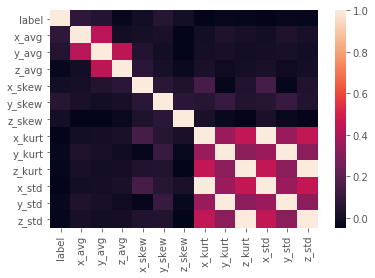

In [278]:
# Recheck the correlation with new variables
            
cor_2 = X_1.corr()
sns.heatmap(cor_2)
plt.show()

# Kurtosis is highly correlated with STD, removing all 3 kurtosis features

In [279]:
X_1 = X_1.drop(['x_kurt', 'y_kurt', 'z_kurt'], axis = 1)

## Modeling

After extracting features for our given window, this will now become a supervised classification problem. We will use two classification models which work well out of the box: KNN, Random Forest and SVM. 

In [284]:
## K-NN (Take two)

X = X_1.drop('label', axis = 1) # Matrix of features
y = X_1.label # Vector of prediction

# Create a parameter grid dictionary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

param_grid = {'n_neighbors': [3,4,5,6]}

clf_knn_2 = KNeighborsClassifier()

grid_2 = GridSearchCV(clf_knn_2, param_grid)

grid_2.fit(X_train, y_train)


print("Best param: {}".format(grid_2.best_params_))

C:\Users\sawal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best param: {'n_neighbors': 5}


In [288]:
print("Best Score: {}".format(grid_2.best_score_))

Best Score: 0.8098526951923596


In [289]:
clf_knn_3 = KNeighborsClassifier(n_neighbors = 5) 

clf_knn_3.fit(X_train, y_train)

y_pred = clf_knn_3.predict(X_test)

In [290]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.91      0.94      0.92      1509
           2       0.66      0.44      0.53       111
           3       0.62      0.62      0.62       507
           4       0.77      0.80      0.79       864
           5       0.69      0.50      0.58       119
           6       0.60      0.51      0.56       101
           7       0.85      0.85      0.85      1423

   micro avg       0.82      0.82      0.82      4634
   macro avg       0.73      0.67      0.69      4634
weighted avg       0.81      0.82      0.82      4634



This model has already outperformed our null model. We are seeing less accurate scores for the underrepresented classes. Lets see if we can improve our score using more sophisticated algorithms which takes into account these imbalances.

In [291]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = 0.2)


clf_rf = RandomForestClassifier(class_weight = 'balanced',
                                n_estimators = 1000, 
                                criterion = 'entropy', 
                                random_state = 0)
clf_rf.fit(X_train_rf, y_train_rf)

y_pred_rf = clf_rf.predict(X_test_rf)

cm_2 = confusion_matrix(y_test_rf, y_pred_rf)

print(cm_2)


[[1397    3    9    1    0    0   68]
 [  47   16    9   10    0    0   35]
 [  23    1  278   75    6    0  141]
 [  24    0   22  768    3    0   35]
 [   5    0   10   28   57    0   22]
 [   3    0    8   20    1   33   36]
 [  43    0   36   39    0    6 1316]]


In [293]:
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           1       0.91      0.95      0.93      1478
           2       0.80      0.14      0.23       117
           3       0.75      0.53      0.62       524
           4       0.82      0.90      0.86       852
           5       0.85      0.47      0.60       122
           6       0.85      0.33      0.47       101
           7       0.80      0.91      0.85      1440

   micro avg       0.83      0.83      0.83      4634
   macro avg       0.82      0.60      0.65      4634
weighted avg       0.83      0.83      0.82      4634



In [294]:
## SVM

from sklearn.svm import SVC

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size = 0.2)

clf_svm = SVC(class_weight = 'balanced')

clf_svm.fit(X_train_svm, y_train_svm)

y_pred_svm = clf_svm.predict(X_test_svm)

cm = confusion_matrix(y_test_svm, y_pred_svm)

print(cm)


C:\Users\sawal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1075    0    7  378    0    0   17]
 [   2   40    1   64    1    0    1]
 [   0    0  268  230    1    8   37]
 [   8    0   14  806    0    0   14]
 [   1    0    2   74   22    0    8]
 [   2    0    5   65    0   44   17]
 [   1    0   56  412    4    5  944]]


In [295]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.94      0.92      1509
           2       0.66      0.44      0.53       111
           3       0.62      0.62      0.62       507
           4       0.77      0.80      0.79       864
           5       0.69      0.50      0.58       119
           6       0.60      0.51      0.56       101
           7       0.85      0.85      0.85      1423

   micro avg       0.82      0.82      0.82      4634
   macro avg       0.73      0.67      0.69      4634
weighted avg       0.81      0.82      0.82      4634



## Results

After feature engineering using a relatively small window of 2 seconds (against a 52 hz frequency), we were able to improve our F1 score by more than 10% against our null model and reduce the size of our data. 

We are using F1 Score to measure "accuracy", which is a weighted average of recall and precision. The F1 score is more useful than Accuracy when you are dealing with unbalanced classes, which was the case with this project.

## Next Steps

In terms of next steps, we could take two approaches to building a more robust classifier. 

The first approach is continued feature engineering/data cleaning. This could start with using a different window size. We could remove potential outlier noise/signal from our x_acceleration, y_acceleration and z_acceleration features--particularly towards the transition of activities. We could generate additional features using a Fourier or Wavelet function, which could potentially help reduce the noise. Additionally, we could extract new features using Principal Component Analysis, which would reduce our dataset's dimensionality by extracting p components which would explain the most variance.

The second step of the first approach would involve hyper parameter tuning for the Random Forest (number of trees)  and the SVM (C penalty and Gamma hyper parameters). We could also use the XGBoost algorithm, which is a fast and accurate gradient boosting algorithm. Tuning these parameters and/or using XGBoost would likely improve our model's perfomance by 0.01-0.04.

The second approach involves using a Convolutional Neural Network (CNN) to extract features automatically and feed the resulting features into a Recurrent Neural Network - Long Short Term Memory (LSTM). CNNs work well finding local patterns in time series data. An LSTM generalizes well with sequential data. Stacking these two neural networks tends to produce very high accuracy, but will sacrifice interpretability and deeper understanding of the data.